## 1 准备工作

### 1.1 配置环境  

**常用的包**  
* **numpy：**用于处理向量和数组
* **pandas：**基于numpy，类似于一个强大的电子表格
* **scipy：**用于科学计算，包括一些基本的统计学
* **patsy：**用于统计学公式
* **statsmodels：**用于统计学建模分析
* **matplotlib：**用于绘图和可视化
* **seaborn：**基于matplotlib，使用起来更加简单
* **xlrd：**用于读取excel文件
* **PyMC：**用于贝叶斯统计
* **scikit-learn：**用于机器学习
* **scikits.bootstrap：**为scipy提供自助法置信区间算法
* **lifelises：**用于生存分析
* **rpy：**提供一个在Python中运行R函数的包装器

### 1.2 数据输入

文件读取后常需要结合正则进行处理

In [1]:
import pandas as pd

**读取csv文件**

In [2]:
csv_data = pd.read_csv("./data/CCSS_pair.csv")
csv_data.tail()

,time,id,s2,s3,Qa3,Qa4,Qa8,Qa10,Qa16,index1,index1a,index1b,Qa3n,Qa4n,Qa8n,Qa10n,Qa16n,index1n,index1an,index1bn
83,200704,1427,2,26,200,150,100,200,100,117.160041,132.053878,108.964114,100,100,150,200,150,109.349371,110.044898,108.964114
84,200704,1446,2,55,100,100,150,150,100,93.728032,88.035919,96.856991,150,150,150,200,150,124.970710,132.053878,121.071238
85,200704,1456,2,38,100,150,150,150,150,109.349371,110.044898,108.964114,100,150,150,200,100,109.349371,88.035919,121.071238
86,200704,1477,2,47,150,150,200,200,100,124.970710,110.044898,133.178362,150,100,150,200,150,117.160041,132.053878,108.964114
87,200704,1480,1,49,100,100,150,100,100,85.917363,88.035919,84.749867,50,50,100,150,100,70.296024,66.026939,72.642743


**读取txt文件**

In [3]:
txt_data = pd.read_table("./data/CCSS_pair.txt")
txt_data.tail()

,time,id,s2,s3,Qa3,Qa4,Qa8,Qa10,Qa16,index1,index1a,index1b,Qa3n,Qa4n,Qa8n,Qa10n,Qa16n,index1n,index1an,index1bn
83,200704,1427,2,26,200,150,100,200,100,117.160041,132.053878,108.964115,100,100,150,200,150,109.349371,110.044898,108.964115
84,200704,1446,2,55,100,100,150,150,100,93.728032,88.035919,96.856991,150,150,150,200,150,124.970710,132.053878,121.071238
85,200704,1456,2,38,100,150,150,150,150,109.349371,110.044898,108.964115,100,150,150,200,100,109.349371,88.035919,121.071238
86,200704,1477,2,47,150,150,200,200,100,124.970710,110.044898,133.178362,150,100,150,200,150,117.160041,132.053878,108.964115
87,200704,1480,1,49,100,100,150,100,100,85.917363,88.035919,84.749867,50,50,100,150,100,70.296024,66.026939,72.642743


**读取excel文件**

In [4]:
excel_data = pd.read_excel("./data/CCSS_pair.xlsx")
excel_data.tail()

,time,id,s2,s3,Qa3,Qa4,Qa8,Qa10,Qa16,index1,index1a,index1b,Qa3n,Qa4n,Qa8n,Qa10n,Qa16n,index1n,index1an,index1bn
83,200704,1427,2,26,200,150,100,200,100,117.160041,132.053878,108.964114,100,100,150,200,150,109.349371,110.044898,108.964114
84,200704,1446,2,55,100,100,150,150,100,93.728032,88.035919,96.856991,150,150,150,200,150,124.970710,132.053878,121.071238
85,200704,1456,2,38,100,150,150,150,150,109.349371,110.044898,108.964114,100,150,150,200,100,109.349371,88.035919,121.071238
86,200704,1477,2,47,150,150,200,200,100,124.970710,110.044898,133.178362,150,100,150,200,150,117.160041,132.053878,108.964114
87,200704,1480,1,49,100,100,150,100,100,85.917363,88.035919,84.749867,50,50,100,150,100,70.296024,66.026939,72.642743


## 2 描述统计

前言：统计学分为描述统计和推断统计。描述统计着眼于如何从过去的数据中挖掘有用的结论，进而从整体上把握已有的数据。常用的方法有度量数据的集中趋势、离散程度、分布形状以及数据的可视化等。推断统计着眼于基于已有的数据做出假设，理论基础包括概率论、抽样理论、参数估计和假设检验。

### 2.1 数据类型

**分类数据**
* **布尔变量：**仅有两个可能的类别取值，比如男性/女性
* **名义变量：**不止两个类别，比如已婚/未婚/离异
* **顺序变量：**有序分类，比如很少/一般/很多

**数值型变量**
* **连续变量：**取值有无限的可能性，比如身高：171.5/171.4/168.3等
* **离散型变量：**取值有限，比如子女的个数：0/1/2/3等

### 2.2 描述统计

**2.2.1 连续变量**   

集中趋势  
* 均值  
    适用于**单峰和基本对称数据**的集中趋势度量，它不适用于**严重偏态**分布的数据。由于考虑了所有信息，均值的抗异常性最好。
* 中位数  
    由于中位数只考虑居中位置，对信息的利用不充分，所以只有当**均值不能使用的情况下**才会用中位数加以描述
* 其他  
    几何平均数：当数据本身是比率时使用几何平均数（G=lg<sup>-1</sup>(∑X/n)）  
    截尾平均数：由于均值易受极端值影响所以一般考虑去掉两端数据再计算，通常两端各去掉5%的数据  
    众数：频率最大的数，一般很少使用  
    
离散程度 
* 全距  
    一般只适用于预备性检查  
* 方差和标准差  
    总体方差：σ<sup>2</sup>=Σ(X-μ)<sup>2</sup>/n  
    样本方差：s<sup>2</sup>=Σ(X-$\bar x$)<sup>2</sup>/n-1   
    方差和标准差适用于正态分布数据，当数据有**明显的极端值**时不宜使用。  
* 分位数
    四分距既排除了极端值的影响，有反映了较多数据的离散程度，当方差和标准差不宜使用时能较好地描述离散程度
* 变异系数
    当需要比较两组数据的离散程度时可以使用变异系数来度量，CV=S/$\bar X$

分布特征
* 峰度(K)
    K=0：标准正态分布    
    K<0：分布不足  
    K>0：分布过度  
* 偏度(SK) 
    |SK|>1：高度偏态  
    0.5<|SK|<1：中等偏态  
    |SK|<0.5：低等偏态  
    
**2.2.2 离散变量**  

集中趋势
* 众数

离散程度
* 异众比率

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [6]:
data = pd.read_csv('./data/CCSS_Sample.csv')
data.tail()

,time,id,s0,s2,s3,s4,s5,s7,s9,c0_1,...,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
1142,200912,1566,300,1,35,4,5,1,99,2,...,,100,100,100,100,100,100,78.106694,88.035919,72.642743
1143,200912,1567,300,2,40,2,2,1,6,2,...,4500,150,150,100,100,100,100,93.728032,110.044898,84.749867
1144,200912,1568,300,1,21,4,3,2,11,2,...,17500,100,200,100,100,150,150,109.349371,110.044898,108.964114
1145,200912,1569,300,2,29,3,2,1,99,2,...,,150,100,100,100,100,100,85.917363,110.044898,72.642743
1146,200912,1570,300,2,25,2,3,1,10,2,...,12500,150,200,150,100,150,150,124.970710,132.053878,121.071238


In [7]:
# 描述统计
data.index1.describe()

count    1147.000000
mean       95.893501
std        20.997097
min         0.000000
25%        85.917363
50%        93.728032
75%       109.349371
max       156.213387
Name: index1, dtype: float64

In [8]:
# 偏度
data.index1.skew()

-0.3601697927587871

低等偏度且数据呈负偏态

In [9]:
# 峰度
data.index1.kurt()

1.1576799429424907

数据分布过度

Text(0, 0.5, 'frequency')

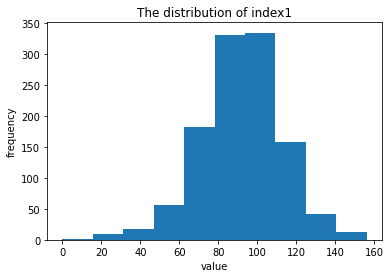

In [10]:
plt.hist(data.index1)
plt.title('The distribution of index1')
plt.xlabel('value')
plt.ylabel('frequency')

### 2.3 统计数据的展示
**可视化也是描述统计的一种，常能揭露一些有用的结论**

**2.3.1 matplotlib**  
matplotlib是Python 中常用的绘图包，包含如下的模块和特性：
* **matplotlib.pyplot：**用来生成图形的模块
* **matplotlib.mlab：**包含了许多在Matlab下常用的函数，如find，griddata等
* **backends：**matplotlib可以生成不同格式的输出，这就称为backends。
    * %matplotlib inline：能直接输出到当前的浏览器中
    * %matplotlib qt4：输出到独立的图形窗口，使用命令plt.ginput可以允许用户平移并缩放图形，还能交互式的选择图形上的点
    * 使用命令plt.savefig能够将图形输出为外部文件，如PDF、PNG等格式

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [12]:
# 生成数据
x = np.arange(0, 10, 0.2)
y1 = np.sin(x)
y2 = np.cos(x)

Text(0, 0.5, 'Cos')

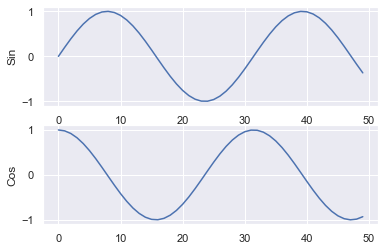

In [13]:
# 生成图例和坐标轴
fig, axs = plt.subplots(nrows=2, ncols=1)

# 绘图：绘制在多个轴上
axs[0].plot(y1)
axs[0].set_ylabel('Sin')

axs[1].plot(y2)
axs[1].set_ylabel('Cos')

Text(0, 0.5, 'Sin & Cos')

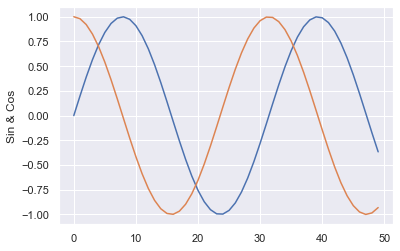

In [14]:
# 绘图：绘制在一个轴上
fig, ax = plt.subplots()
ax.plot(y1)
ax.plot(y2)
ax.set_ylabel('Sin & Cos')

**2.3.2 绘图**  

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import scipy.stats as stats
import seaborn as sns; sns.set()
import scikits.bootstrap as bootstrap

In [16]:
data = pd.read_csv('./data/CCSS_sample.csv')
data.tail()

,time,id,s0,s2,s3,s4,s5,s7,s9,c0_1,...,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
1142,200912,1566,300,1,35,4,5,1,99,2,...,,100,100,100,100,100,100,78.106694,88.035919,72.642743
1143,200912,1567,300,2,40,2,2,1,6,2,...,4500,150,150,100,100,100,100,93.728032,110.044898,84.749867
1144,200912,1568,300,1,21,4,3,2,11,2,...,17500,100,200,100,100,150,150,109.349371,110.044898,108.964114
1145,200912,1569,300,2,29,3,2,1,99,2,...,,150,100,100,100,100,100,85.917363,110.044898,72.642743
1146,200912,1570,300,2,25,2,3,1,10,2,...,12500,150,200,150,100,150,150,124.970710,132.053878,121.071238


**散点图**  
能够展示大量原始数据

Text(0.5, 1.0, 'Scatter diagram')

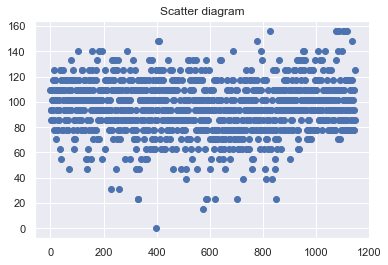

In [17]:
plt.scatter(np.arange(len(data.index1)), data.index1)
plt.title('Scatter diagram')

**直方图**  
提供数据的概览

Text(0.5, 1.0, 'Histogram chart')

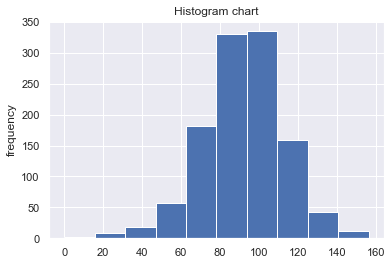

In [18]:
plt.hist(data.index1)
plt.ylabel('frequency')
plt.title('Histogram chart')

**核密度图**  
直方图有一个缺陷，它是非连续的，并且它的形状严格取决于区间的宽度。为了获得平滑的概率密度，我们可以使用核密度估计的方法。

Text(0.5, 1.0, 'Kernel density chart')

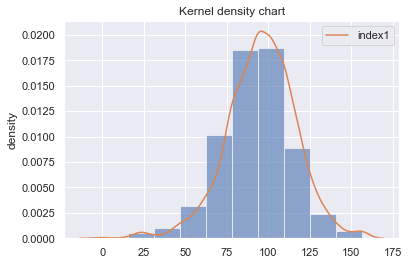

In [19]:
plt.hist(data.index1, density=True, alpha=0.6)
sns.kdeplot(data.index1)
plt.ylabel('density')
plt.title('Kernel density chart')

**累计频率**

Text(0.5, 1.0, 'Cumulative frequency chart')

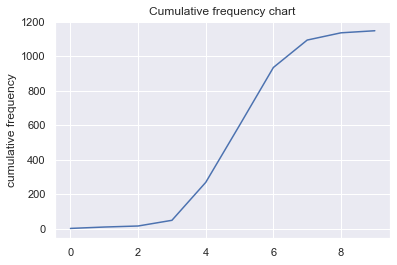

In [20]:
plt.plot(stats.cumfreq(data.index1)[0])
plt.ylabel('cumulative frequency')
plt.title('Cumulative frequency chart')

**误差条图**  
展示均值及变异度的常用方法。误差条图必须注明是基于标准差还是标准误，使用标准误有一个很好的特性：如果两组误差条图不重合，则可以认为两组之间没有统计学差异。反之不一定成立。

In [21]:
ser = data.groupby('time').index1.mean()
ser

time
200704     98.336327
200712     94.139120
200812     90.439330
200912    101.996231
Name: index1, dtype: float64

In [22]:
output = data.groupby('time').index1.apply(lambda x: bootstrap.ci(x, output='errorbar'))
output

time
200704    [[2.2130229894035267], [2.0828451664974352]]
200712      [[2.646378110393556], [2.466527170852231]]
200812     [[2.389448196763084], [2.3123692226739365]]
200912     [[2.451046874800852], [2.5164081247955465]]
Name: index1, dtype: object

In [23]:
yerr = [[x[0][0] for x in output], [y[1][0] for y in output]]
yerr

[[2.2130229894035267, 2.646378110393556, 2.389448196763084, 2.451046874800852],
 [2.0828451664974352,
  2.466527170852231,
  2.3123692226739365,
  2.5164081247955465]]

Text(0.5, 1.0, 'Error bar chart')

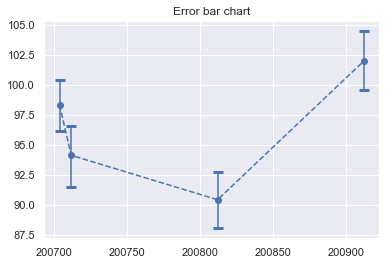

In [24]:
index = np.arange(5)
y = index**2
errorBar = index/2
plt.errorbar(ser.index, ser.values, yerr=yerr, fmt='--o', capsize=5, capthick=3)
plt.title('Error bar chart')

**箱线图**

Text(0.5, 1.0, 'Box plots chart')

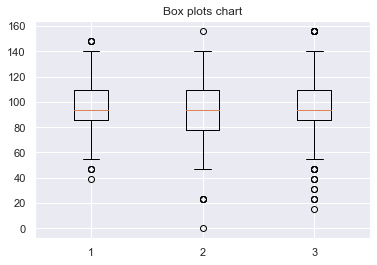

In [25]:
plt.boxplot([data[data.s0==100].index1, data[data.s0==200].index1, data[data.s0==300].index1])
plt.title('Box plots chart')

**分组条形图**

Text(0.5, 1.0, 'Bar chart')

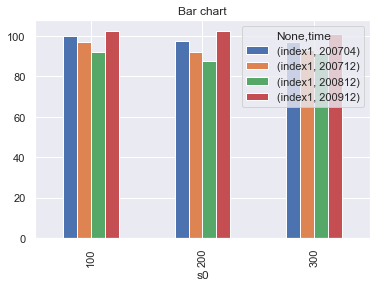

In [26]:
data.groupby(['s0', 'time']).mean().index1.to_frame().unstack().plot(kind='bar')
plt.title('Bar chart')

**饼图**

Text(0.5, 1.0, 'Pie chart')

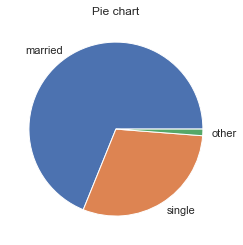

In [27]:
plt.pie(data.s7.value_counts(), labels=['married', 'single', 'other'])
plt.title('Pie chart')

## 3 概率论

前言：概率分布用以表述随机变量取值的概率规律，统计量的分布称为抽样分布。统计量是样本的函数，它是一个随机变量，

### 3.1 基本概念
**常用公式**
* 加法公式：P(A∪B) = P(A) + P(B) - P(A∩B)  
* 乘法公式：P(A∩B) = P(B|A)×P(A)  
* 条件概率：P(A|B) = P(A∩B) / P(B)  
* 贝叶斯公式：P(A|B) = P(B|A)×P(A) / P(B)
    P(A)：A的先验概率，A发生的概率越低，误判的可能性越大，所以应当尽可能的搜集信息以“提高”A的概率  
    P(A|B)：A的后验概率  
    P(B)：B的先验概率  
    P(B|A)：B的后验概率  

**运算法则**  

| 统计量                                         | 公式                                              |
| ---------------------------------------------- | ------------------------------------------------- |
| E(aX+b)                                        | aE(X)+b                                           |
| Var(aX+b)                                      | a<sup>2</sup>Var(X)                               |
| E(X)                                           | ∑xp(X=x)                                          |
| E(f(x))                                        | ∑f(x)p(X=x)                                       |
| Var(aX-bY)                                     | a<sup>2</sup>Var(X)+b<sup>2</sup>Var(Y)           |
| Var(X)                                         | E(X-μ)<sup>2</sup>=E(X<sup>2</sup>)-μ<sup>2</sup> |
| E(aX-bY)                                       | aE(X)-bE(Y)                                       |
| E(x<sub>1</sub>+x<sub>2</sub>+x<sub>3</sub>)   | 3E(X)                                             |
| Var(x<sub>1</sub>+x<sub>2</sub>+x<sub>3</sub>) | 3Var(X)                                           |
| E(X<sup>2</sup>)                               | ∑x<sup>2</sup>p(X=x)                              |
| Var(aX-b)                                      | a<sup>2</sup>Var(X)   

### 3.2 概率分布

**3.2.1 离散分布**

In [28]:
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import random
np.random.seed(987654321)

**伯努利分布**  
二项分布的基础，仅有两种状态

In [29]:
p = 0.2
bernoulliDist = stats.bernoulli(p)

In [30]:
bernoulliDist.pmf(1)  # 正面出现一次的概率

0.2

In [31]:
bernoulliDist.rvs(10)  # 模拟10次伯努利试验，rvs表示随机变数(random variates)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**二项分布**  
二项分布的期望E(X)=np，方差Var(X)=npq。且当np>5，nq>5时可以用正态分布来近似二项分布
* 试验由一系列相同的n个试验组成(伯努利试验)
* 每次试验有两种可能的结果，成功或者失败
* 每次试验成功的概率是相同的，用p来表示
* 试验是相互独立的

In [32]:
# 生成样本
binomialDist = Series(np.random.binomial(n=20, p=0.5, size=1000))  # n:单次试验次数；p:成功概率；size:抽样次数

In [33]:
print('mean = ', binomialDist.mean())
print('var = ', binomialDist.var())

mean =  10.048
var =  4.748444444444487


Text(0.5, 1.0, 'Binomial distribution')

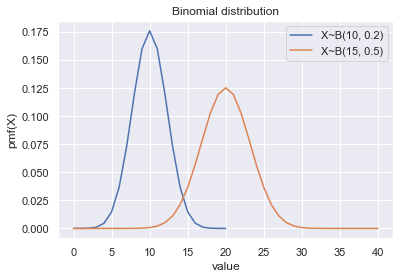

In [34]:
plt.plot(stats.binom(n=20, p=0.5).pmf(np.arange(21)))
plt.plot(stats.binom(n=40, p=0.5).pmf(np.arange(41)))
plt.legend(['X~B(10, 0.2)', 'X~B(15, 0.5)'])
plt.xlabel('value')
plt.ylabel('pmf(X)')
plt.title('Binomial distribution')

Text(0, 0.5, 'cummulative frequency')

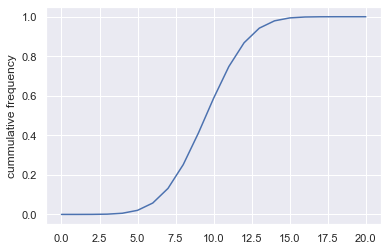

In [35]:
binomDist = stats.binom(20, 0.5)

plt.plot(binomDist.cdf(np.arange(21)))
plt.ylabel('cummulative frequency')

例：某医院每天接生37个新生儿，求某天接生的男孩小于15个的概率？

In [36]:
newBornDist = stats.binom(37, 0.5)

Text(0, 0.5, 'cummulative frequency')

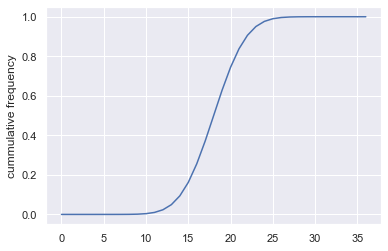

In [37]:
plt.plot(newBornDist.cdf(np.arange(37)))
plt.ylabel('cummulative frequency')

In [38]:
print("概率为：", newBornDist.cdf(15))

概率为： 0.16200430004391825


**泊松分布**  
二项分布与泊松分布均是研究某事件发生的次数，二项分布着眼于一个固定的实验总数中成功的次数，而泊松分布测量了在连续的时间或空间内离散事件发生的次数。
* 泊松分布的期望和方差均等于λ
* 当p<0.05，n>20时可以用泊松分布近似二项分布
* 当λ>=5时，可以用正态分布近似泊松分布

In [39]:
poisoonDist = np.random.poisson(lam=4, size=1000)  # lam:区间的期望

In [40]:
print('mean = ', poisoonDist.mean())
print('var = ', poisoonDist.var())

mean =  3.885
var =  4.035775


Text(0.5, 1.0, 'Poisson distribution')

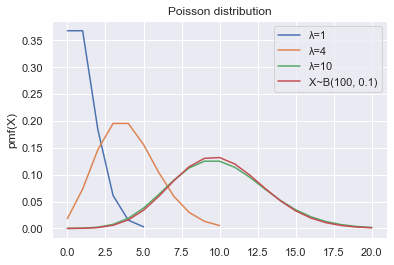

In [41]:
plt.plot(stats.poisson(1).pmf(np.arange(6)))
plt.plot(stats.poisson(4).pmf(np.arange(11)))
plt.plot(stats.poisson(10).pmf(np.arange(21)))
plt.plot(stats.binom(100, 0.1).pmf(np.arange(21)))
plt.legend(['λ=1', 'λ=4', 'λ=10', 'X~B(100, 0.1)'])
plt.ylabel('pmf(X)')
plt.title('Poisson distribution')

X ~ B(100, 0.1)近似于X ~ Po(10)

例：某商店平均每周售出17个罐头，请问每周应当备货多少才不会发生缺货？

In [42]:
cannedFoods = stats.poisson(17)

Text(0, 0.5, 'pdf(X)')

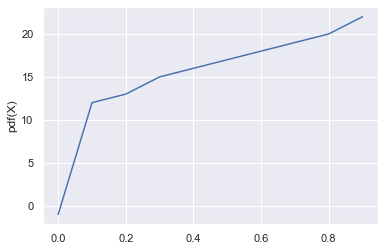

In [43]:
plt.plot(np.arange(0, 1, 0.1), cannedFoods.ppf(np.arange(0, 1, 0.1)))
plt.ylabel('pdf(X)')

In [44]:
print('应当备货：', int(cannedFoods.ppf(0.95)), '个罐头')

应当备货： 24 个罐头


**3.2.2 连续分布**

**指数分布**  
* 指数分布的期望E(X)=1/λ，方差Var(X)=(1/λ)<sup>2</sup>
* 指数分布是泊松分布的时间间隔

In [45]:
expoDist = np.random.exponential(scale=0.25, size=1000)  # scale:1/λ

In [46]:
print('mean = ', expoDist.mean())
print('var = ', expoDist.var())

mean =  0.235469621643097
var =  0.05881543252631602


Text(0.5, 1.0, 'expon distribution')

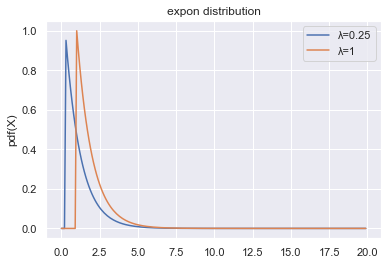

In [47]:
plt.plot(np.arange(0, 20, 0.1), stats.expon(0.25).pdf(np.arange(0, 20, 0.1)))
plt.plot(np.arange(0, 20, 0.1), stats.expon(1).pdf(np.arange(0, 20, 0.1)))
plt.legend(['λ=0.25', 'λ=1'])
plt.ylabel('pdf(X)')
plt.title('expon distribution')

例：某公交站，每小时平均停靠6辆车，求1）每小时至少停靠4辆车的概率，2）到达车站后，5分钟内来一辆车的概率

In [48]:
busPoissonDist = stats.poisson(6)
print('至少停靠三辆的概率为：', busPoissonDist.cdf(4))

至少停靠三辆的概率为： 0.2850565003166312


In [49]:
busExpoDist = stats.expon(0.1)
print("5分钟内来一辆车的概率为：", busExpoDist.cdf(5))

5分钟内来一辆车的概率为： 0.9925534169290756


**正态分布**  
* 方差越大正态分布曲线越平缓
* 大部分数据分布在±3σ之间
* 两个正态分布的和/差也是正态分布

Text(0.5, 1.0, 'norm distribution')

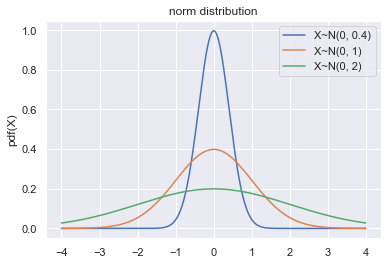

In [50]:
plt.plot(np.arange(-4, 4, 0.01), stats.norm(0, 0.4).pdf(np.arange(-4, 4, 0.01)))
plt.plot(np.arange(-4, 4, 0.01), stats.norm(0, 1).pdf(np.arange(-4, 4, 0.01)))
plt.plot(np.arange(-4, 4, 0.01), stats.norm(0, 2).pdf(np.arange(-4, 4, 0.01)))
plt.legend(['X~N(0, 0.4)', 'X~N(0, 1)', 'X~N(0, 2)'])
plt.ylabel('pdf(X)')
plt.title('norm distribution')

In [51]:
normDist = stats.norm(0, 0.4)

In [52]:
lower, upper = normDist.cdf([-0.4, 0.4])
print('±σ：', upper - lower)

±σ： 0.6826894921370859


In [53]:
lower, upper = normDist.cdf([-0.8, 0.8])
print('±2σ：', upper - lower)

±2σ： 0.9544997361036416


In [54]:
lower, upper = normDist.cdf([-1.2, 1.2])
print('±3σ：', upper - lower)

±3σ： 0.9973002039367398


例：如果男性平均身高是170cm，标准差是6cm，那么随机选择一个男性的身高为183cm的概率是多少？

In [55]:
manHeights = stats.norm(170, 6)
print('身高为183cm的概率为：', manHeights.pdf(183))

身高为183cm的概率为： 0.006358770584402997


**t分布**  

样本均值的抽样分布，相较于正态分布更加“温和敦厚”，适用于小样本或者总体的均值/标准差未知的情况  

t = ($\bar x$ - μ)/(s/$\sqrt{n}$)

Text(0.5, 1.0, 't-distribution')

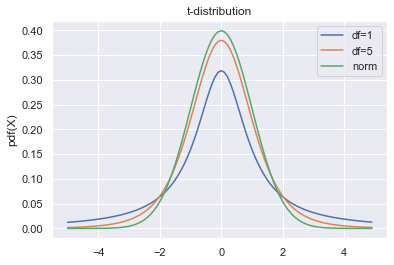

In [56]:
plt.plot(np.arange(-5, 5, 0.1), stats.t(df=1).pdf(np.arange(-5, 5, 0.1)))
plt.plot(np.arange(-5, 5, 0.1), stats.t(df=5).pdf(np.arange(-5, 5, 0.1)))
plt.plot(np.arange(-5, 5, 0.1), stats.norm(0, 1).pdf(np.arange(-5, 5, 0.1)))
plt.legend(['df=1', 'df=5', 'norm'])
plt.ylabel('pdf(X)')
plt.title('t-distribution')

例：某药品宣称治愈率为90%，现抽取10组样本(每组10名病人），治愈率如下：  
87% 90% 76% 77% 85% 94% 79% 83% 88% 72%  
请问是否达到其宣称的治愈率？  

假设  
H0：μ≥0.9，治愈率达到广告宣称  
H1：μ<0.9，治愈率未达到广告宣称

In [57]:
import math

In [58]:
n, df = 10, 10-1
data = Series([0.87, 0.9, 0.76, 0.77, 0.85, 0.94, 0.79, 0.83, 0.88, 0.72])
print('mean = ', data.mean())
print('std = ', data.std())

mean =  0.8310000000000001
std =  0.06967384333050992


In [59]:
pvalue = stats.t(df=df, loc=0.9, scale=data.std()/math.sqrt(n)).cdf(data.mean())
print('pvalue = ', pvalue)

pvalue =  0.006044332304254716


pvalue=0.006远小于0.05，拒绝原假设，可以认为治愈率未达到广告宣称效果

**卡方分布**  

**定义：**若n个相互独立的随机变量ξ₁，ξ₂，...,ξn ，均服从标准正态分布，则这n个服从标准正态分布的随机变量的平方和构成一新的随机变量，其分布规律称为卡方分布（chi-square distribution）。用于描述正态分布数据的变异情况

Text(0.5, 1.0, 'chi-square distribution')

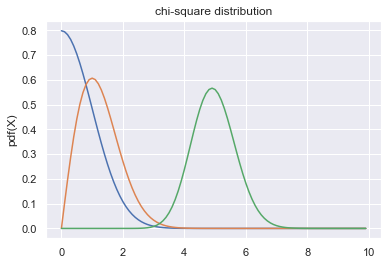

In [60]:
plt.plot(np.arange(0, 10, 0.1), stats.chi(df=1).pdf(np.arange(0, 10, 0.1)))
plt.plot(np.arange(0, 10, 0.1), stats.chi(df=2).pdf(np.arange(0, 10, 0.1)))
plt.plot(np.arange(0, 10, 0.1), stats.chi(df=25).pdf(np.arange(0, 10, 0.1)))
plt.ylabel('pdf(X)')
plt.title('chi-square distribution')

例：一个药品制造商街道一个药品订单，需要发货的药片重量标准差σ=0.05。先从某批药品中随机抽取出一个样本，详情如下：  
3.04g、2.94g、3.01g、3.00g、2.94g、2.91g、3.02g、3.04g、3.09g、2.95g、2.99g、3.10g、3.02g  
该批药品的标准差是否满足要求？  

假设  
H0：σ=0.05，该批药品满足要求  
H1：σ≠0.05，该批药品不满足要求  

In [61]:
sigma = 0.05
data = Series([3.04, 2.94, 3.01, 3.00, 2.94, 2.91, 3.02, 3.04, 2.95, 2.99, 3.10, 3.02, 3.09])
print('mean = ', data.mean())
print('var = ', data.var())

mean =  3.003846153846154
var =  0.0033256410256410226


In [62]:
df = len(data)-1
X2 = (df * data.var()) / sigma**2
print('pvalue = ', stats.chi2(df=len(data)-1).cdf(X2))

pvalue =  0.8070669334571484


pvalue=0.807>0.05，无法拒绝原假设

**F分布**  

**定义：**它是两个服从卡方分布的独立随机变量各除以其自由度后的比值的抽样分布，是一种非对称分布，且位置不可互换，主要用于比较两组正态分布的变异程度

Text(0.5, 1.0, 'F-distribution')

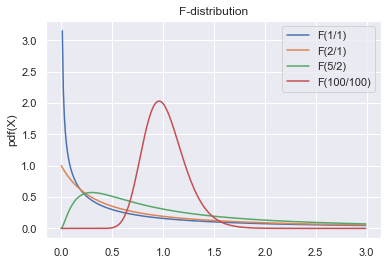

In [63]:
plt.plot(np.arange(0, 3, 0.01), stats.f(1, 1).pdf(np.arange(0, 3, 0.01)))
plt.plot(np.arange(0, 3, 0.01), stats.f(2, 1).pdf(np.arange(0, 3, 0.01)))
plt.plot(np.arange(0, 3, 0.01), stats.f(5, 2).pdf(np.arange(0, 3, 0.01)))
plt.plot(np.arange(0, 3, 0.01), stats.f(100, 100).pdf(np.arange(0, 3, 0.01)))
plt.legend(['F(1/1)', 'F(2/1)', 'F(5/2)', 'F(100/100)'])
plt.ylabel('pdf(X)')
plt.title('F-distribution')

例：现有两款眼动仪，要求用户向右看20°，测得数据如下，请问两款眼动仪之间的精确度和准确度是否有差异？  
类型一：20.7、20.3、20.3、20.3、20.7、19.9、19.9、19.9、20.3、20.3、19.7、20.3  
类型二：19.7、19.4、20.1、18.6、18.8、20.2、18.7、19.0  

假设  
H0：μ<sub>1</sub>=μ<sub>2</sub>，两款眼动仪精确度相同  
H1：μ<sub>1</sub>≠μ<sub>2</sub>，两款眼动仪精确度不相同  

H1：σ<sub>1</sub>=σ<sub>2</sub>，两款眼动仪准确度相同  
H1：σ<sub>1</sub>≠σ<sub>2</sub>，两款眼动仪准确度不相同  

In [64]:
data1 = Series([20.7, 20.3, 20.3, 20.3, 20.7, 19.9, 19.9, 19.9, 20.3, 20.3, 19.7, 20.3])
data2 = Series([19.7, 19.4, 20.1, 18.6, 18.8, 20.2, 18.7, 19.0])

In [65]:
print('mean = ', data1.mean())
print('std = ', data1.std())

mean =  20.21666666666667
std =  0.31285585799020627


In [66]:
print('mean = ', data2.mean())
print('std = ', data2.std())

mean =  19.3125
std =  0.6334429729659962


In [67]:
fDist = stats.f(len(data1)-1, len(data2)-1)
print("pvalue = ", fDist.cdf(data1.var()/data2.var())*2)

pvalue =  0.037330339862822866


pvalue=0.037<0.05，拒绝原假设，可以认为两款仪器的准确度不同，类型一的眼动仪准确度优于类型二

In [68]:
stats.ttest_ind(data1, data2, equal_var=False)

Ttest_indResult(statistic=3.7442642053683572, pvalue=0.004332382394719009)

pvalue=0.004远小于0.05，拒绝原假设，可以认为两款眼动仪的精度不同

### 3.3 练习

**1.正态分布**
* 生成并绘制均值为5、标准差为3的正态分布的概率密度图
* 从该分布中生成1000个随机数据
* 计算这些数据均值的标准差
* 从PPF计算包含95%数据的区间
* 某零件只要和指定大小的误差在1mm之间都可以正常装配，且即使每1000个零件一个无效，机器仍可以正常运转。那么该零件的标准差需要是多少才能够同时满足这两个需求？

In [69]:
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import stat
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import math
np.random.seed(123456789)

In [70]:
normDist = stats.norm(5, 3)

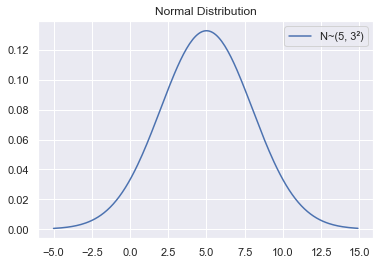

In [71]:
plt.plot(np.arange(-5, 15, 0.1), normDist.pdf(np.arange(-5, 15, 0.1)))
plt.title('Normal Distribution')
plt.legend(['N~(5, 3²)'])

In [72]:
print('数据均值的标准差为(n=1000)：', 3/math.sqrt(1000))

数据均值的标准差为(n=1000)： 0.09486832980505139


In [73]:
print('包含95%数据的区间为[', normDist.ppf(0.025), ',', normDist.ppf(0.975), ']')

包含95%数据的区间为[ -0.879891953620163 , 10.879891953620163 ]


In [74]:
stdNorm = stats.norm(0, 1)

In [75]:
print('零件标准差为：', 1 / stdNorm.ppf(0.9995))

零件标准差为： 0.3039027127266642


**t分布**  

如果你同事的体重分别如下，计算均值以及99%置信区间。  
52kg、70kg、65kg、85kg、62kg、83kg、59kg

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas import Series, DataFrame

In [77]:
weights = Series([52, 70, 65, 85, 62, 83, 59])
n = len(weights)

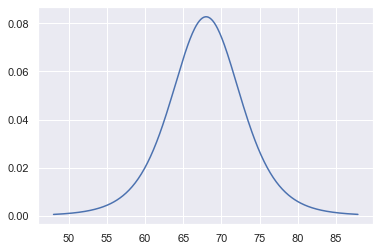

In [78]:
tDist = stats.t(loc=weights.mean(), scale=weights.std()/math.sqrt(n), df=n-1)
plt.plot(np.arange(weights.mean()-20, weights.mean()+20, 0.1), tDist.pdf(np.arange(weights.mean()-20, weights.mean()+20, 0.1)))

In [79]:
print('体重均值99%置信区间为：[', tDist.ppf(0.005), ',', tDist.ppf(0.995), ']')

体重均值99%置信区间为：[ 50.837943096987104 , 85.16205690301288 ]


**卡方分布**  

如果你同事的体重分别如下，计算方差以及95%置信区间。  
52kg、70kg、65kg、85kg、62kg、83kg、59kg

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas import Series, DataFrame

In [81]:
weights = Series([52, 70, 65, 85, 62, 83, 59])
n = len(weights)

In [82]:
chi2Dist = stats.chi2(df=n-1)

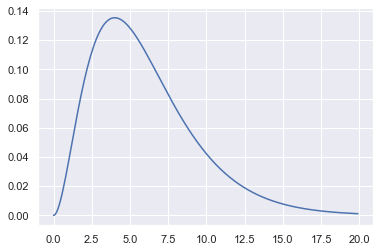

In [83]:
plt.plot(np.arange(0, 20, 0.1), chi2Dist.pdf(np.arange(0, 20, 0.1)))

In [84]:
upper = chi2Dist.ppf(0.975)

In [85]:
print('体重方差99%置信区间为：[', ((n-1)*weights.var())/upper, ',', ((n-1)*weights.var())/lower, ']')

体重方差99%置信区间为：[ 62.28642962800445 , 666717.0252209252 ]


**F分布**  

如果你同事的体重分别如下：   
52kg、70kg、65kg、85kg、62kg、83kg、59kg  
另一组同事体重如下：  
77kg、89kg、56kg、88kg、97kg、68kg  
他们体重的方差相同吗？

H0:σ<sub>1</sub>=σ<sub>2</sub>，两组同事体重的方差无明显差异  
H1：σ<sub>1</sub>≠σ<sub>2</sub>，两组同事体重的方差有明显差异

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas import Series, DataFrame

In [87]:
weights1 = Series([77, 89, 56, 88, 97, 68])
weights2 = Series([52, 70, 65, 85, 62, 83, 59])
n = len(weights1)
m = len(weights2)
weights1.var(), weights2.var()

(231.76666666666665, 150.0)

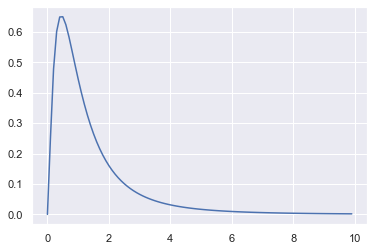

In [88]:
fDist = stats.f(n-1, m-1)
plt.plot(np.arange(0, 10, 0.1), fDist.pdf(np.arange(0, 10, 0.1)))

In [89]:
fvalue = weights1.var()/weights2.var()

fvalue, fDist.cdf(fvalue)

(1.545111111111111, 0.6961470747062618)

pvalue=0.696>0.05，无法拒绝原假设，可以认为两组同事体重方差相同

**二项分布**  

奥地利人出现纯蓝色眼镜的概率为37%，如果教室里有15个奥地利学生，那么找到3个、6个、10个蓝眼睛学生的概率为多少？

In [90]:
binomDist = stats.binom(n=15, p=0.37)

In [91]:
print('找到3个蓝眼学生的概率为：', binomDist.pmf(3))

找到3个蓝眼学生的概率为： 0.09009551296310978


In [92]:
print('找到6个蓝眼学生的概率为：', binomDist.pmf(6))

找到6个蓝眼学生的概率为： 0.2007610097274685


In [93]:
print('找到10个蓝眼学生的概率为：', binomDist.pmf(10))

找到10个蓝眼学生的概率为： 0.014330961198412468


**泊松分布**  

2012年，奥地利街头发生62起死亡事件，求一周内没有发生、发生2起以及发生5起事故的概率为多大？

In [94]:
poissonDist = stats.poisson(1.19)

In [95]:
print('没有发生事故的概率为：', poissonDist.pmf(0))

没有发生事故的概率为： 0.3042212640667041


In [96]:
print('发生2起事故的概率为：', poissonDist.pmf(2))

发生2起事故的概率为： 0.2154038660224298


In [97]:
print('发生5起事故的概率为：', poissonDist.pmf(5))

发生5起事故的概率为： 0.006049829391041528


## 4 抽样理论

**抽样分布：**抽样分布是基于随机样本给定统计量的概率分布

In [98]:
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import random
np.random.seed(987654321)

### 4.1 均值的抽样分布

**中心极限定理：**当样本量足够大时，无论总体服从什么分布，随机变量的均值服从正态分布。且有抽样分布的均值等于总体均值(μ)，方差等于总体方差除以样本量(σ<sup>2</sup>/n)

In [99]:
# 生成总体
normTotal = Series(np.random.normal(0, 1, size=1000)) # 正态分布总体（μ=0，σ=1）
randomTotal = Series(np.random.rand(1000))  # 随即总体

In [100]:
print('mean = ', randomTotal.mean())
print('var = ', randomTotal.var())

mean =  0.48787400836346084
var =  0.0824848673980701


Text(0.5, 1.0, 'Randon data')

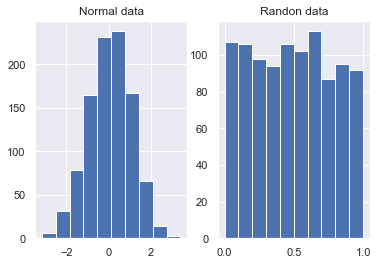

In [101]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(normTotal)
axs[0].set_title('Normal data')
axs[1].hist(randomTotal)
axs[1].set_title('Randon data')

In [102]:
# 抽样
normSamples = DataFrame([normTotal.sample(10, replace=True).values for i in range(1000)])
lNormSamples = DataFrame([normTotal.sample(30, replace=True).values for i in range(1000)])
randomSamples = DataFrame([randomTotal.sample(10, replace=True).values for i in range(1000)])
lRandomSamples = DataFrame([randomTotal.sample(30, replace=True).values for i in range(1000)])

In [103]:
print('mean = ', lRandomSamples.mean(axis=1).mean())
print('var = ', lRandomSamples.mean(axis=1).var())

mean =  0.485256632714381
var =  0.00294727560163705


抽样分布的均值等于总体均值，方差等于总体方差除以样本量

Text(0.5, 1.0, 'Random, n=30')

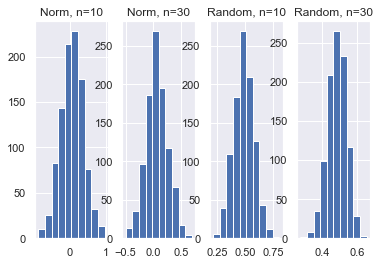

In [104]:
fig, axs = plt.subplots(nrows=1, ncols=4)
axs[0].hist(normSamples.mean(axis=1))
axs[0].set_title('Norm, n=10')
axs[1].hist(lNormSamples.mean(axis=1))
axs[1].set_title('Norm, n=30')
axs[2].hist(randomSamples.mean(axis=1))
axs[2].set_title('Random, n=10')
axs[3].hist(lRandomSamples.mean(axis=1))
axs[3].set_title('Random, n=30')

由上图可知，样本量越小，均值抽样分布的变异性越大

### 4.2 样本比例的抽样分布
当样本量足够大时，根据二项分布的原理和渐进分布的原理可知，样本比例的抽样分布服从均值为π(总体比例)，方差为π(1-π)/n的正态分布

In [105]:
pi = (normTotal < -1).sum()/len(normTotal)
print('pi = ', pi)

pi =  0.156


In [106]:
percentDist = (lNormSamples < -1).sum(axis=1) / 30
print('mean = ', percentDist.mean())
print('var = ', percentDist.var())

mean =  0.1579333333333328
var =  0.004114510065621211


Text(0.5, 1.0, 'Sampling distribution of propotion')

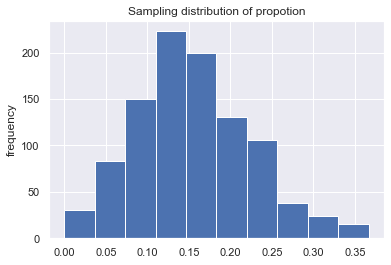

In [107]:
plt.hist(percentDist)
plt.ylabel('frequency')
plt.title('Sampling distribution of propotion')

### 4.3 样本方差的抽样分布
若样本X1,X2,...Xn来自于正态分布总体，则样本方差服从自由度为样本量减一的卡方分布(n-1)S<sup>2</sup>/σ<sup>2</sup>~χ<sup>2</sup>(n-1)，且有如下特征：
* χ<sup>2</sup>分布E(X)=n，Var(X)=2n  
* χ<sup>2</sup>分布自由度越大越接近于正态分布

In [108]:
chis = 29 * lNormSamples.var(axis=1) / normTotal.var()

In [109]:
print('mean = ', chis.mean())
print('var = ', chis.var())

mean =  29.026358714286122
var =  55.11250109583977


Text(0, 0.5, 'frequecny')

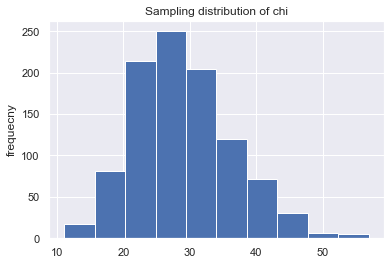

In [110]:
plt.hist(chis)
plt.title('Sampling distribution of chi')
plt.ylabel('frequecny')

Text(0.5, 1.0, 'chi-square distribution')

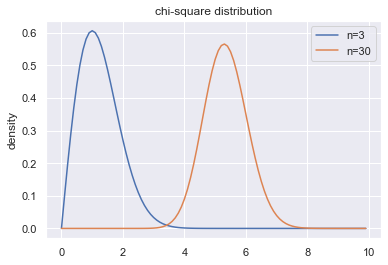

In [111]:
plt.plot(np.arange(0, 10, 0.1), stats.chi(2).pdf(np.arange(0, 10, 0.1)))
plt.plot(np.arange(0, 10, 0.1), stats.chi(29).pdf(np.arange(0, 10, 0.1)))
plt.legend(['n=3', 'n=30'])
plt.ylabel('density')
plt.title('chi-square distribution')

### 4.4 样本方差比的抽样分布
若样本X1,X2,...Xn以及Y1,Y2,...Yn分别来自于两个正态分布总体，且X、Y相互独立，则(S<sub>x</sub><sup>2</sup>/σ<sub>x</sub><sup>2</sup>)/(S<sub>y</sub><sup>2</sup>/σ<sub>y</sub><sup>2</sup>)~F(n<sub>x</sub>-1, n<sub>y</sub>-1)  
F(m, n)的期望E(X)=n/n-2(n>2)，方差D(X)=(2n<sup>2</sup>×(m+n-2))/(m(n-2)<sup>2</sup>×(n-4))(n>4)

In [112]:
# 构建一个新的正态总体
normTotal1 = Series(np.random.normal(1, 2, size=1000))  # 正态分布总体（μ=1，σ=2）

In [113]:
print('mean = ', normTotal1.mean())
print('std = ', normTotal1.std())

mean =  1.0258050434889665
std =  2.0645796312819162


In [114]:
# 随机抽样
normSamples1 = DataFrame([normTotal1.sample(20).values for i in range(1000)])
normSamples1.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
995,-0.095625,0.445826,-1.943993,0.822835,3.305433,0.201713,-1.620132,0.943582,2.858355,-1.490478,-1.056835,5.481785,3.773199,1.315190,-0.240473,-2.637734,3.122561,2.325296,3.320271,1.414196
996,0.345543,3.429553,2.565857,2.802256,1.607603,0.934920,2.411627,-0.300249,0.445826,1.093260,0.784620,-2.491079,2.319199,1.315190,-2.224857,1.716672,0.329569,3.627600,-1.048817,4.530766
997,3.429553,0.160882,1.076627,0.024747,-0.054283,6.263660,-0.185182,-0.502522,0.827331,-0.137835,1.537185,1.515715,0.669750,1.607603,-1.070082,3.990353,-0.307711,-0.347629,-0.433797,3.436662
998,1.472765,-0.817980,-0.556520,-1.293711,2.921192,-1.186875,1.546244,1.801755,-0.272244,1.470525,3.305433,2.515979,4.272942,0.713587,1.239774,2.650277,4.761060,-1.034872,6.515896,1.611901
999,3.153278,1.580374,3.792159,0.445826,-1.772139,0.876298,-0.129382,0.702570,0.741148,3.434907,-1.312821,0.004360,2.272892,2.294376,2.040198,4.132836,3.908637,-2.081953,1.565831,1.836795


In [115]:
Fs = (normSamples1.var(axis=1) / normTotal1.var()) / (normSamples.var(axis=1) / normTotal.var())  # F(19, 29)

In [116]:
print('mean = ', Fs.mean())
print('var = ', Fs.var())

mean =  1.2915908627240518
var =  0.7457421899591524


Text(0.5, 1.0, 'Sampling distribution of F')

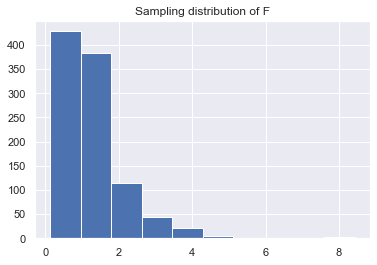

In [117]:
plt.hist(Fs)
plt.title('Sampling distribution of F')

Text(0.5, 1.0, 'F-distribution')

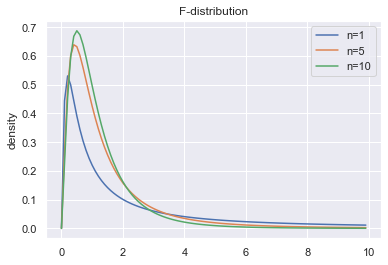

In [118]:
plt.plot(np.arange(0, 10, 0.1), stats.f(5, 1).pdf(np.arange(0, 10, 0.1)))
plt.plot(np.arange(0, 10, 0.1), stats.f(5, 5).pdf(np.arange(0, 10, 0.1)))
plt.plot(np.arange(0, 10, 0.1), stats.f(5, 10).pdf(np.arange(0, 10, 0.1)))
plt.legend(['n=1', 'n=5', 'n=10'])
plt.ylabel('density')
plt.title('F-distribution')

### 4.5 抽样分布和假设检验之间的关系

例：美国新生儿的平均体重为3.5kg，标准差为0.76kg。如果一个新生儿的体重为2.6kg，那么其体重是否正常？  

假设：  
H0：体重正常  
H1：体重不正常

In [119]:
import scipy.stats as stats

In [120]:
newBornDist = stats.norm(3.5, 0.76)
print('新生儿体重小于2.6kg的概率为：', newBornDist.cdf(2.6))

新生儿体重小于2.6kg的概率为： 0.11816486815719918


无法拒绝原假设，可以认为体重正常

## 5 参数估计

**定义：**根据样本信息来推断总体参数  

**基本概念：**
* **估计量**：用来估计总体参数的统计量，比如均值、方差、t等
* **估计值**：根据样本计算出来的估计量的具体数值
* **点估计**：用样本统计量的估计值作为总体参数的估计值
* **区间估计**：在点估计的基础上，给出估计的可靠性区间（置信区间）
* **置信水平**：100个置信区间中包含真值的区间所占的比例

**评价估计量的标准：**  
* **无偏性**：样本估计量抽样分布的期望等于总体参数
* **有效性**：对同一个总体参数的两个无偏估计，有更小标准差的估计更有效
* **一致性**：随着样本的增大，估计量的值更加接近总体参数

### 5.1 bootstrap方法

**bootstrap方法：**https://zhuanlan.zhihu.com/p/41099219

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import random
import math
import scikits.bootstrap as bootstrap
np.random.seed(987654321)

In [122]:
# 导入数据
data = pd.read_csv('./data/CCSS_sample.csv')
data.tail()

,time,id,s0,s2,s3,s4,s5,s7,s9,c0_1,...,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
1142,200912,1566,300,1,35,4,5,1,99,2,...,,100,100,100,100,100,100,78.106694,88.035919,72.642743
1143,200912,1567,300,2,40,2,2,1,6,2,...,4500,150,150,100,100,100,100,93.728032,110.044898,84.749867
1144,200912,1568,300,1,21,4,3,2,11,2,...,17500,100,200,100,100,150,150,109.349371,110.044898,108.964114
1145,200912,1569,300,2,29,3,2,1,99,2,...,,150,100,100,100,100,100,85.917363,110.044898,72.642743
1146,200912,1570,300,2,25,2,3,1,10,2,...,12500,150,200,150,100,150,150,124.970710,132.053878,121.071238


In [123]:
print('mean = ', data.index1.mean())
print('95%置信区间：', bootstrap.ci(data.index1, np.mean))

mean =  95.89350142093545
95%置信区间： [94.64052569 97.06476134]


In [124]:
print('std = ', data.index1.std())
print('95%置信区间：', bootstrap.ci(data.index1, np.std))

std =  20.99709732468994
95%置信区间： [19.97397202 22.11779795]


### 5.2 一个总体参数估计

**5.2.1 总体均值的区间估计**  

**统计量选择**：
* 大样本(n＞30)：均值的抽样分布符合中心极限定理，使用z统计量
* 小样本(n≤30)：由于实际情况中很难得到总体方差，因此一般使用t统计量

例：某企业每天生产8000袋食盐，食盐重量符合正态分布, σ=10。按规定每袋食盐的重量为100g，现从中抽取25个样本，1）求食盐重量95%置信区间，2）该批食盐是否符合规定。  

样本（单位：克）：112.5, 101.0, 103.0, 102.0, 100.5, 102.6, 107.5, 95.0, 108.8, 115.6, 100.0, 123.5, 102.0, 101.6, 102.2, 116.6, 95.4, 97.8, 108.6, 105.0, 136.8, 102.8, 101.5, 98.4, 93.3

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import pandas as np
from pandas import Series
import numpy as np
import math

In [126]:
weights = Series([112.5, 101.0, 103.0, 102.0, 100.5, 102.6, 107.5, 95.0, 108.8, 115.6, 100.0, 123.5, 102.0, 101.6, 102.2, 116.6, 95.4, 97.8, 108.6, 105.0, 136.8, 102.8, 101.5, 98.4, 93.3])
n = len(weights)
mean = weights.mean()
std = weights.std()
sigma = 10

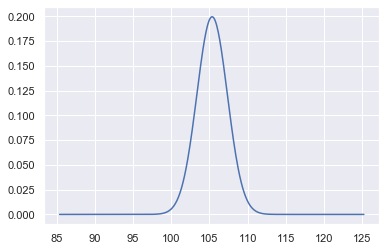

In [127]:
normDist = stats.norm(loc=mean, scale=sigma/math.sqrt(n))
plt.plot(np.arange(mean-sigma*2, mean+sigma*2, 0.1), normDist.pdf(np.arange(mean-sigma*2, mean+sigma*2, 0.1)))

In [128]:
print("95%置信区间为：[", normDist.ppf(0.025), ',', normDist.ppf(0.975), ']')

95%置信区间为：[ 101.44007203091991 , 109.27992796908012 ]


H0:μ=100，该品产品符合规定  
H1：μ≠100，该品产品不符合规定

In [129]:
pvalue = normDist.cdf(100)
print('pvalue=', pvalue*2)

pvalue= 0.007362216018349807


pvalue=0.007，远小于0.05，拒绝原假设，认为该批食盐不符合规定

例：某批灯泡的寿命符合正态分布，现抽取16个样本，测的寿命如下：  
1510, 1450, 1480, 1460, 1520, 1480, 1490, 1460, 1480, 1510, 1530, 1470, 1500, 1520, 1510, 1470  
求该批灯泡寿命95%置信区间

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import pandas as np
from pandas import Series
import numpy as np
import math

In [131]:
lens = Series([1510, 1450, 1480, 1460, 1520, 1480, 1490, 1460, 1480, 1510, 1530, 1470, 1500, 1520, 1510, 1470])
mean = lens.mean()
std = lens.std()
n = len(lens)
df = n - 1

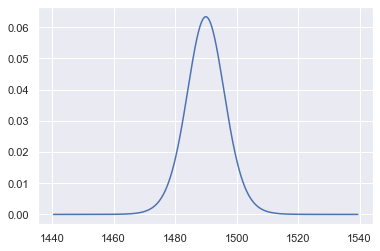

In [132]:
tDist = stats.t(loc=mean, scale=std/math.sqrt(n), df=df)
plt.plot(np.arange(mean-std*2, mean+std*2, 0.1), tDist.pdf(np.arange(mean-std*2, mean+std*2, 0.1)))

In [133]:
print('灯泡寿命95%置信区间为：[', tDist.ppf(0.025), ',', tDist.ppf(0.975), ']')

灯泡寿命95%置信区间为：[ 1476.8033606044887 , 1503.1966393955113 ]


**5.2.2 总体比例的区间估计**  

一般样本较大所以使用z统计量，且E(p)=pi(总体比例)，σ<sub>p</sub><sup>2</sup>=pi(1-pi)/n

为了解某市下岗女工情况，先随机抽取100名下岗职工，其中女性65人。求下岗工人中女性所占比例的95%置信区间。

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import pandas as np
from pandas import Series
import numpy as np
import math

In [135]:
p = 0.65
n = 100
sigma = math.sqrt((p*(1-p))/n)

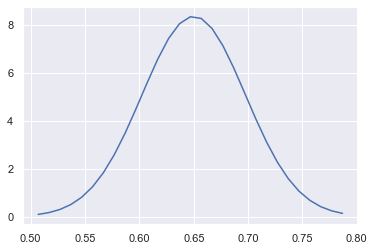

In [136]:
normDist = stats.norm(loc=p, scale=sigma)
plt.plot(np.arange(p-3*sigma, p+3*sigma, 0.01), normDist.pdf(np.arange(p-3*sigma, p+3*sigma, 0.01)))

In [137]:
print('女性下岗员工所占比例95%置信区间为：[', normDist.ppf(0.025), ',', normDist.ppf(0.975), ']')

女性下岗员工所占比例95%置信区间为：[ 0.5565156760890944 , 0.7434843239109057 ]


**5.2.3 总体方差区间估计**  

根据X<sup>2</sup>定义，这里仅考虑总体为正态的情况  

例：求上述食盐重量方差的95%置信区间

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import pandas as np
from pandas import Series
import numpy as np
import math

In [139]:
weights = Series([112.5, 101.0, 103.0, 102.0, 100.5, 102.6, 107.5, 95.0, 108.8, 115.6, 100.0, 123.5, 102.0, 101.6, 102.2, 116.6, 95.4, 97.8, 108.6, 105.0, 136.8, 102.8, 101.5, 98.4, 93.3])
n = len(weights)
df = n - 1
mean = weights.mean()
var = weights.var()
sigma = 10

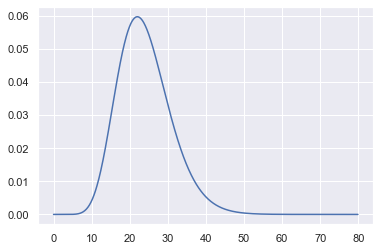

In [140]:
chi2Dist = stats.chi2(df=df)
plt.plot(np.arange(0, 80, 0.1), chi2Dist.pdf(np.arange(0, 80, 0.1)))

In [141]:
lower = chi2Dist.ppf(0.025)
upper = chi2Dist.ppf(0.975)

In [142]:
print('食盐重量方差95%置信区间为：[', df*var/upper, ',', df*var/lower, ']')

食盐重量方差95%置信区间为：[ 56.82897120865117 , 180.3881060043311 ]


### 5.3 两个总体参数的区间估计

**5.3.1 两总体均值之差**  

**统计量选择**：
* 大样本：z统计量
* 小样本：t统计量（符合正态性和独立性）  
* 匹配样本：类似于一个总体的区间估计

例：两所中学高考英语成绩抽样结果如下，求两所中学高考英语成绩差的95%置信区间  
学校1：n<sub>1</sub> = 46, $\bar{x}$<sub>1</sub> = 86, s<sub>1</sub>=5.8  
学校2：n<sub>2</sub> = 33, $\bar{x}$<sub>2</sub> = 78, s<sub>2</sub>=7.2

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import pandas as np
from pandas import Series
import numpy as np
import math

In [144]:
x1 = 86
x2 = 78
n1 = 46
n2 = 33
s1 = 5.8
s2 = 7.2

diff_x = x1 - x2
diff_s = math.sqrt(s1**2/n1+s2**2/n2)

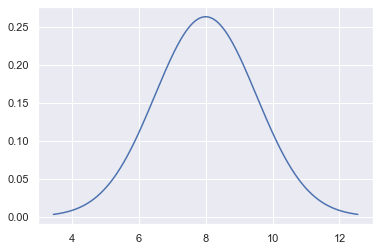

In [145]:
normDist = stats.norm(loc=diff_x, scale=diff_s)
plt.plot(np.arange(diff_x-3*diff_s, diff_x+3*diff_s, 0.01), normDist.pdf(np.arange(diff_x-3*diff_s, diff_x+3*diff_s, 0.01)))

In [146]:
print('两校高考英语成绩差95%置信区间为：[', normDist.ppf(0.025), ',', normDist.ppf(0.975), ']')

两校高考英语成绩差95%置信区间为：[ 5.026137507995736 , 10.973862492004262 ]


例：两种方法组装所用时间如下，试以95%置信区间构建两种方法所需时间之差的置信区间。  
方法一：28.3, 30.1, 29.0, 37.6, 32.1, 28.8, 36.0, 37.2, 38.5, 34.4, 28.0, 30.0  
方法二：27.6, 22.2, 31, 33.8, 20.0, 30.2, 31.7, 26.0, 32.0, 31.2, 33.4, 26.5

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import pandas as np
from pandas import Series
import numpy as np
import math

In [148]:
times1 = Series([28.3, 30.1, 29.0, 37.6, 32.1, 28.8, 36.0, 37.2, 38.5, 34.4, 28.0, 30.0])
times2 = Series([27.6, 22.2, 31, 33.8, 20.0, 30.2, 31.7, 26.0, 32.0, 31.2, 33.4, 26.5])
x1 = times1.mean()
x2 = times2.mean()
diff_x = x1 - x2
n1 = len(times1)
n2 = len(times2)
s1 = times1.std()
s2 = times2.std()
s1, s2

(3.999545428716073, 4.399793383578576)

H0:σ<sub>1</sub>=σ<sub>2</sub>，二者方差相等  
H1:σ<sub>1</sub>≠σ<sub>2</sub>，二者方差不相等  

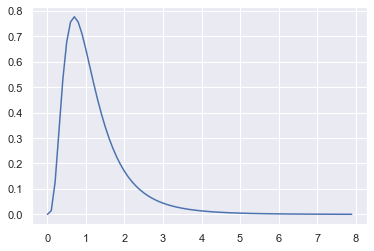

In [149]:
f = s2**2 / s1**2
fDist = stats.f(n2-1, n1-1)
plt.plot(np.arange(0, 8, 0.1), fDist.pdf(np.arange(0, 8, 0.1)))

In [150]:
pvalue = fDist.cdf(f)
pvalue

0.6213400958405298

pvalue=0.621，远大于0.025，无法拒绝原假设，故可以认为二者方差相等

In [151]:
sp2 = ((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2)
sp2

17.677272727272726

In [152]:
diff_s = math.sqrt(sp2*(1/n1+1/n2))

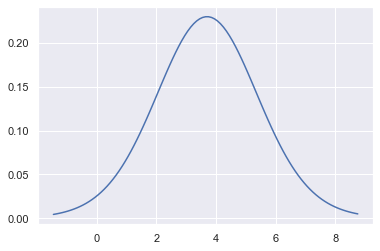

In [153]:
tDist = stats.t(loc=diff_x, scale=diff_s, df=n1+n2-2)
plt.plot(np.arange(diff_x-3*diff_s, diff_x+3*diff_s, 0.1), tDist.pdf(np.arange(diff_x-3*diff_s, diff_x+3*diff_s, 0.1)))

In [154]:
print('所需平均时间之差95%置信区间为：[', tDist.ppf(0.025), ',', tDist.ppf(0.975), ']')

所需平均时间之差95%置信区间为：[ 0.14029361395375606 , 7.259706386046249 ]


例：两种方法组装所用时间如下，假定两总体方差不相等，试以95%置信区间构建两种方法所需时间之差的置信区间。  
方法一：28.3, 30.1, 29.0, 37.6, 32.1, 28.8, 36.0, 37.2, 38.5, 34.4, 28.0, 30.0  
方法二：27.6, 22.2, 31, 33.8, 20.0, 30.2, 31.7, 26.5

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import pandas as np
from pandas import Series
import numpy as np
import math

In [156]:
times1 = Series([28.3, 30.1, 29.0, 37.6, 32.1, 28.8, 36.0, 37.2, 38.5, 34.4, 28.0, 30.0])
times2 = Series([27.6, 22.2, 31, 33.8, 20.0, 30.2, 31.7, 26.5])
x1 = times1.mean()
x2 = times2.mean()
diff_x = x1 - x2
n1 = len(times1)
n2 = len(times2)
s1 = times1.std()
s2 = times2.std()
diff_s = math.sqrt(s1**2/n1 + s2**2/n2)
s1, s2

(3.999545428716073, 4.797246233889962)

In [157]:
df = (s1**2/n1 + s2**2/n2)**2/((s1**2/n1)**2/(n1-1) + (s2**2/n2)**2/(n2-1))
df

13.188411975534692

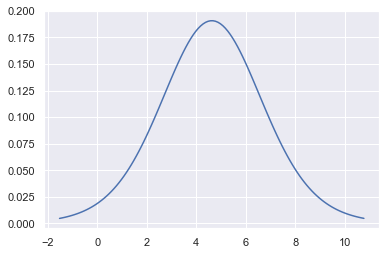

In [158]:
tDist = stats.t(loc=diff_x, scale=diff_s, df=df)
plt.plot(np.arange(diff_x-3*diff_s, diff_x+3*diff_s, 0.1), tDist.pdf(np.arange(diff_x-3*diff_s, diff_x+3*diff_s, 0.1)))

In [159]:
print('所需平均时间之差95%置信区间为：[', tDist.ppf(0.025), ',', tDist.ppf(0.975), ']')

所需平均时间之差95%置信区间为：[ 0.19886650415340235 , 9.051133495846603 ]


例：10名学生A、B试卷得分如下，求分数差值95%置信区间。  
A：78, 63, 72, 89, 91, 49, 68, 76, 85, 55  
B：71, 44, 61, 84, 74, 51, 55, 60, 77, 39

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import pandas as np
from pandas import Series
import numpy as np
import math

In [161]:
A_scores = Series([78, 63, 72, 89, 91, 49, 68, 76, 85, 55])
B_scores = Series([71, 44, 61, 84, 74, 51, 55, 60, 77, 39])
diff_scores = A_scores - B_scores
diff_x = diff_scores.mean()
n = len(diff_scores)
diff_s = math.sqrt(diff_scores.var()/n)
df = n-1

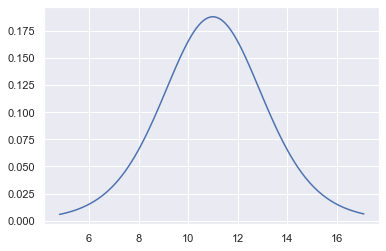

In [162]:
tDist = stats.t(loc=diff_x, scale=diff_s, df=df)
plt.plot(np.arange(diff_x-3*diff_s, diff_x+3*diff_s, 0.1), tDist.pdf(np.arange(diff_x-3*diff_s, diff_x+3*diff_s, 0.1)))

In [163]:
print('AB卷成绩差95%置信区间为：[', tDist.ppf(0.025), ',', tDist.ppf(0.975), ']')

AB卷成绩差95%置信区间为：[ 6.327308257173502 , 15.672691742826498 ]


**5.3.2 两总体比例差的区间估计**  

例：某电视节目在农村随机抽样400人，收视率为32%；在城市随机抽样500人，收视率45%。求农村和城市收视率之差95%置信区间。

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import pandas as np
from pandas import Series
import numpy as np
import math

In [165]:
p1 = 0.32
n1 = 400
p2 = 0.45
n2 = 500
diff_x = p2 - p1
diff_s = math.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)

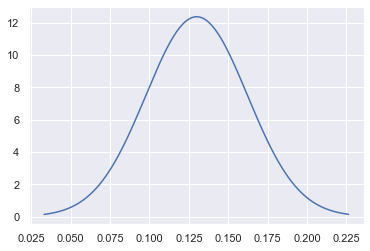

In [166]:
normDist = stats.norm(loc=diff_x, scale=diff_s)
plt.plot(np.arange(diff_x-3*diff_s, diff_x+3*diff_s, 0.001), normDist.pdf(np.arange(diff_x-3*diff_s, diff_x+3*diff_s, 0.001)))

In [167]:
print('收视率差值95%置信区间为：[', normDist.ppf(0.025), ',', normDist.ppf(0.975), ']')

收视率差值95%置信区间为：[ 0.06682345597691183 , 0.19317654402308815 ]


**5.3.3 两总体方差比的区间估计**  

例：某大学随机抽样25名男生以及25名女生，生活费支出统计如下，试求男女生生活费支出方差比95%置信区间   
男生：$\bar{x}$<sub>1</sub>=520,  s<sub>1</sub><sup>2</sup>=260  
女生：$\bar{x}$<sub>2</sub>=480,  s<sub>2</sub><sup>2</sup>=280  

In [168]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import pandas as np
from pandas import Series
import numpy as np
import math

In [169]:
x1 = 520
s1_2 = 260
x2 = 480
s2_2 = 280
n1 = 25
n2 = 25

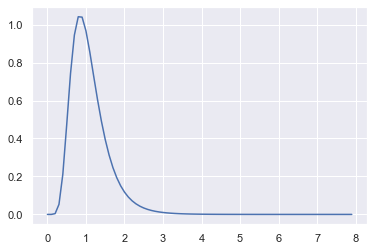

In [170]:
fDist = stats.f(n1-1, n2-1)
plt.plot(np.arange(0, 8, 0.1), fDist.pdf(np.arange(0, 8, 0.1)))

In [171]:
lower = fDist.ppf(0.05)
upper = fDist.ppf(0.95)
lower, upper

(0.5040933467362559, 1.983759568489613)

In [172]:
print('男女生生活费方差比95%置信区间为：[', (s1_2/s2_2)/upper, ',', (s1_2/s2_2)/lower, ']')

男女生生活费方差比95%置信区间为：[ 0.4680866791122377 , 1.8420624564546408 ]


### 5.4 样本量确定

n = (z<sub>α/2</sub>)<sup>2</sup>σ<sup>2</sup>/E<sup>2</sup>，其余以此类推

例：工商管理大学毕业生年薪的标准差为2000元，假定要估计年薪的95%置信区间，且误差为400元，则样本量应为多大？

In [173]:
E = 400
sigma = 2000
z = stats.norm.ppf(0.975)

In [174]:
n = (z**2 * sigma**2) / E**2
n

96.03647051735314

向上取整，所以样本量应为97人

## 6 假设检验

参数估计和假设检验都是利用样本对总体进行推断，但是推断的角度不同。参数估计着眼于用样本统计量估计总体参数，假设检验则先对总体参数提出一个假设，然后利用样本信息进行检验

In [175]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import random
import math
import scikits.bootstrap as bootstrap
np.random.seed(987654321)

### 6.1 假设检验

**6.1.1 原理**  

如果样本x<sub>1</sub>∈X，那么样本x<sub>1</sub>的置信区间不包含总体真值属于小概率事件。所以如果样本y<sub>1</sub>落在样本x<sub>1</sub>的置信区间外，我们就能有很大的信心认为x<sub>1</sub>和y<sub>1</sub>不属于同一总体

In [176]:
# 构建总体
randomTotal = Series(np.random.rand(1000))
mean = randomTotal.mean()
std = randomTotal.std()
print('mean = ', mean)
print('std = ', std)

mean =  0.5058927774654426
std =  0.28346429512534466


In [177]:
# 抽样
randomSamples = DataFrame([randomTotal.sample(30, replace=True).values for i in range(50)])
randomSamples.tail()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
45,0.781846,0.617532,0.375031,0.791415,0.465028,0.223442,0.258369,0.851285,0.357601,0.333309,...,0.242379,0.759206,0.143785,0.739766,0.703891,0.908946,0.539226,0.051176,0.498319,0.977782
46,0.121472,0.730904,0.841580,0.746898,0.766405,0.364989,0.418846,0.609532,0.624058,0.268622,...,0.600708,0.415548,0.448725,0.503475,0.031663,0.716229,0.467964,0.493368,0.154347,0.187196
47,0.880589,0.019835,0.613765,0.235112,0.582850,0.465464,0.104633,0.359457,0.545052,0.888174,...,0.790967,0.627134,0.590746,0.767441,0.607293,0.939889,0.147567,0.498319,0.230936,0.553072
48,0.167772,0.154334,0.376062,0.444729,0.837034,0.154334,0.630074,0.883610,0.241006,0.715655,...,0.561991,0.495211,0.525920,0.068385,0.703259,0.629058,0.216037,0.089353,0.159726,0.051176
49,0.023008,0.885720,0.352568,0.913209,0.675201,0.069508,0.430367,0.841580,0.089353,0.726524,...,0.640339,0.943013,0.328031,0.553072,0.059585,0.230015,0.844667,0.396468,0.682099,0.119209


In [178]:
# 计算置信区间
temp = randomSamples.apply(lambda x: bootstrap.ci(x), axis=1)

In [179]:
low = [x[0] for x in temp.values]    # 置信区间下限
high = [x[1] for x in temp.values]   # 置信区间上限

Text(0.5, 1.0, 'The distribution of  confidence interval')

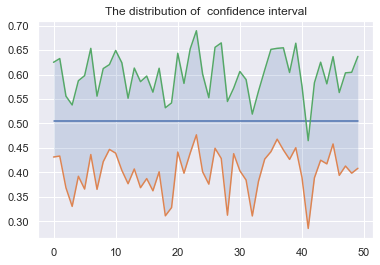

In [180]:
plt.plot(np.zeros(50) + mean)
plt.plot(np.arange(50), low, high)    
plt.fill_between(np.arange(50), low, high, alpha=0.2)
plt.title('The distribution of  confidence interval')

In [181]:
p = ((Series(low) > mean) | (Series(high) < mean)).sum() / 50  # 不包含总体真值的置信区间比例
print('p = ', p)

p =  0.02


由上可知，如果样本来自于某一总体，那么它的置信区间不包含总体真值为小概率事件（在本次实验中概率为0.06）

**6.1.2 P值的解释**  

例：张三某门课程平时成绩如下，某次考试中张三考了110份，请问张三是否正常发挥？ 

成绩：109.4、76.2、128.7、93.7、85.6、117.7、117.2、87.3、100.3、55.1  

假设：  
H0：μ=110，张三正常发挥  
H1：μ≠110，张三发挥不正常

In [182]:
scores = Series([109.4, 76.2, 128.7, 93.7, 85.6, 117.7, 117.2, 87.3, 100.3, 55.1]) 

Text(0.5, 1.0, 'Scatter chart of scores')

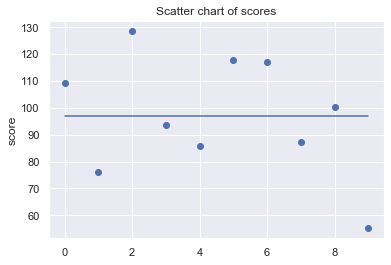

In [183]:
plt.scatter(np.arange(len(scores)), scores)
plt.plot([scores.mean() for i in range(len(scores))])
plt.ylabel('score')
plt.title('Scatter chart of scores')

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([ 55.1,  76.2,  85.6,  87.3,  93.7, 100.3, 109.4, 117.2, 117.7,
         128.7])),
 (23.84591479398987, 97.12, 0.9861570958624173))

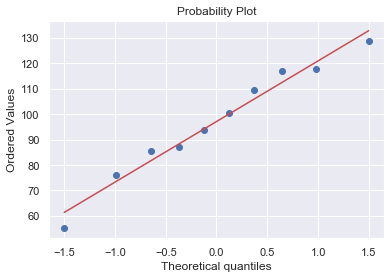

In [184]:
# 正态性检验
stats.probplot(scores, plot=plt)

In [185]:
stats.shapiro(scores)

(0.9724767208099365, 0.9128104448318481)

由上可知，数据基本符合正态性

In [186]:
# t检验
tDist = stats.t(df=len(scores)-1)
X = (110 - scores.mean()) / stats.sem(scores)
pvalue = 2*tDist.sf(X)
print('pvalue = ', pvalue)

pvalue =  0.0995384365279066


pvalue=0.0995>0.05，无法拒绝原假设，可以认为张三正常发挥

由上可知，P值实际上是指当原假设成立时，得到一个检验统计量值的可能性，本例中指张三考取110分的可能性。

可以使用校准的P值来估计拒绝原假设时犯错误的概率：  
α(p) = 1/(1+1/-e×p×log(p))

**6.1.3 两类错误**  
详解：https://www.zhihu.com/question/20993864

* **一类错误α**  
    定义：原假设为真是拒绝原假设的概率，比如身体健康却被诊断为癌症  
* **二类错误β**  
    定义：当原假设为假时接受原假设的概率，比如患有癌症但却诊断为身体健康  
    假设检验的效能定义为（1-β）×100

In [187]:
from statsmodels.stats import power

In [188]:
power.tt_ind_solve_power(effect_size=0.5, alpha=0.05, power=0.8)

63.76561177540974

In [189]:
power.tt_ind_solve_power(alpha=0.05, power=0.8, nobs1=25)

0.8087077886680407

**6.1.4 样本量**  

一个二元假设的敏感度/效能是当备择假设为真时，检验正确拒绝了原假设的概率。决定统计学检验效能和计算解释一定大小所需要的最小样本量，叫做效能分析。它包含4个因素：
* α：Ⅰ类错误的概率
* β：Ⅱ类错误的概率
* d：效应的大小，及所研究的效应相对样本的标准差大小
* n：样本的大小

当上述3个参数固定，那么第4个参数也唯一确定了。

例1：抽样总体的均值为x<sub>1</sub>，标准差为σ，实际的总体均值为x<sub>1</sub>+，标准差也是σ，求最小样本量？  

n = (z<sub>1-α/2</sub>+z<sub>1-β</sub>)<sup>2</sup>/d<sup>2</sup>  

d = D/σ

例2：两组正态分布的标准分别是σ<sub>1</sub>、σ<sub>2</sub>，为了检测书均值的绝对差异D，所需最小的样本量是多少？  

n<sub>1</sub>=n<sub>2</sub>=((z<sub>1-α/2</sub>+z<sub>1-β</sub>)<sup>2</sup>+(σ<sub>1</sub><sup>2</sup>+σ<sub>2</sub><sup>2</sup>))/D<sup>2</sup>

In [317]:
from statsmodels.stats import power

nobs = power.tt_ind_solve_power(effect_size=0.5, alpha=0.05, power=0.8)
print(nobs)

63.76561177540974


当我们想比较具有相同个体数和相同标准差的组别，且α=0.05，检验效能=80%，并且想要检验的组间差异是标准差的一半大，那么我们需要64个个体

In [321]:
effect_size = power.tt_ind_solve_power(alpha=0.05, power=0.8, nobs1=25)
print(effect_size)

0.8087077886680407


当α=0.05，检验效能=80%，并且每组有25个个体，那么组间差异最小是样本标准差的81%

**6.1.5 灵敏度和特异性**  

**灵敏度**：也叫效能，及病人患有癌症且被正确诊断的概率  
**特异性**：病人没患癌症并被正确诊断的概率  
**阳性预测值（PPV）**：诊断为癌症的病人中，真正患癌的比例  
**阴性预测值（NPV）**：诊断为健康的病人中，真正健康的比例  


| 检验结果/症状 | 阳性                                  | 阴性                                  |                                          |
| ------------- | ------------------------------------- | ------------------------------------- | ---------------------------------------- |
| 阳性          | 真阳性（TP=25）                       | 假阳性（Ⅰ类错误）(FP=175)             | PPV=真阳性/检验结果阳性=TP/(TP+FP)=12.5% |
| 阴性          | 假阴性(Ⅱ类错误)(FN=10)                | 真阴性(TN=2000)                       | NPV=真阴性/检验结果阴性=TN/(TN+FN)=99.5% |
|               | 灵敏度=真阳性/阳性症状=TP/(TP+FN)=71% | 特异性=真阴性/阴性症状=TN/(TN+FP)=92% |                                          |

在循证医学中，似然比用来评价进行一个诊断测试的价值。经常用检测的灵敏度和特异性来判断检测结果是否改变了状态存在的概率。有两个版本的似然比，一个是针对阳性结果的，称为阳性似然比（LR+）；一个是针对阴性结果的，称为阴性似然比（LR-）

* 假阳性率（α）=Ⅰ类错误=1-特异性=FP/(FP+TN)=8%
* 假阴性率（β）=Ⅱ类错误=1-灵敏度=FN/(FN+TP)=29%
* 效能=灵敏度=1-β
* 阳性似然比=灵敏度/（1-特异度）=8.9
* 阴性似然比=（1-灵敏度）/特异度

这次检验的阳性结果很难用于确诊癌症（PPV=12.5%），需要进一步检测，但是却能保证筛选出71%的患者（灵敏度）。但是这次检验的阴性结果却能够保证病人并没有患癌（NPV=99.5%），并且一次筛查能检测出92%的健康人。

**6.1.6 单尾检验和双尾检验**  

使用双尾检验，样本落入拒绝阈的概率更高

In [190]:
# 构建总体
randomTotal = Series(np.random.rand(1000))
mean = randomTotal.mean()
std = randomTotal.std()
print('mean = ', mean)
print('std = ', std)

mean =  0.49685875674323754
std =  0.2875772156880232


In [191]:
# 抽样
randomSamples = DataFrame([randomTotal.sample(30, replace=True).values for i in range(50)])
randomSamples.tail()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
45,0.707105,0.697503,0.848110,0.396776,0.879120,0.388091,0.521859,0.683965,0.831392,0.857878,...,0.774268,0.971677,0.109798,0.816892,0.780405,0.518897,0.485663,0.496211,0.745255,0.870051
46,0.490987,0.276324,0.034835,0.068473,0.337278,0.877827,0.144262,0.897078,0.321467,0.509263,...,0.611806,0.166254,0.616007,0.565847,0.655310,0.866993,0.789758,0.145370,0.914187,0.105794
47,0.768784,0.745255,0.141769,0.232499,0.925350,0.390182,0.522748,0.421214,0.785480,0.057952,...,0.251052,0.816408,0.024034,0.487193,0.961061,0.061567,0.175576,0.452959,0.611806,0.545471
48,0.368047,0.758391,0.061587,0.093551,0.803760,0.930150,0.337376,0.541812,0.961061,0.611806,...,0.549919,0.113310,0.281217,0.705438,0.276324,0.511947,0.747033,0.631544,0.760160,0.967723
49,0.720575,0.551233,0.318834,0.611806,0.235156,0.694430,0.610675,0.432454,0.359251,0.626086,...,0.349238,0.779638,0.446075,0.233902,0.168592,0.463797,0.536196,0.102183,0.253410,0.811972


In [192]:
# 抽取样本
sampleMeans = Series(randomSamples.mean(axis=1).sample(50).values)

**单尾检验**

In [193]:
# 计算置信区间
temp = randomSamples.apply(lambda x: bootstrap.ci(x, alpha=0.1), axis=1)

In [194]:
# 计算置信区间
oneTail = [x[1] for x in temp.values]   # 单尾检验置信区间

Text(0.5, 1.0, 'One-tail test')

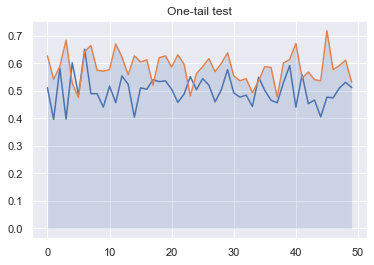

In [195]:
plt.plot(sampleMeans)
plt.plot(np.arange(50), oneTail)    
plt.fill_between(np.arange(50), oneTail, alpha=0.2)
plt.title('One-tail test')

In [196]:
p1 = (sampleMeans > oneTail).sum() / 50  # 样本落入拒绝阈的概率
print('p = ', p1)

p =  0.14


**双尾检验**

In [197]:
# 计算置信区间
temp = randomSamples.apply(lambda x: bootstrap.ci(x), axis=1)

In [198]:
low = [x[0] for x in temp.values]    # 置信区间下限
high = [x[1] for x in temp.values]   # 置信区间上限

Text(0.5, 1.0, 'Two-tail test')

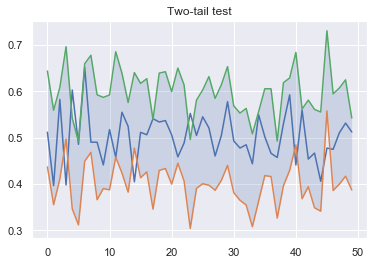

In [199]:
plt.plot(sampleMeans)
plt.plot(np.arange(50), low, high)    
plt.fill_between(np.arange(50), low, high, alpha=0.2)
plt.title('Two-tail test')

In [200]:
p = ((Series(low) > sampleMeans) | (Series(high) < sampleMeans)).sum() / 50  # 不包含总体真值的置信区间比例
print('p = ', p)

p =  0.16


### 6.2 分布类型检验


参数检验假定数据可以有一个或多个参数定义的分布很好的描述（多选择正态分布），这也限制了只有给定数据集的实际上近似选择的分布才能正常工作，否则就只能选择非参数检验。

**6.2.1 正态分布检验**

**1.假设检验**  

优缺点：假设检验方法判断正态性在样本量偏低时可能不够敏感，在样本量较大时又会过于敏感，导致结果失去使用价值，因而优先使用图形检验

K-S检验(适用于大样本，n>5000)  
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')

* rvs:一维数组  
* cdf:分布  
    https://docs.scipy.org/doc/scipy-0.15.1/reference/stats.html#module-scipy.stats
* alternative:检测方法  
    {‘two-sided’, ‘less’,’greater’}  
* return  
    p:单位或双尾p值，p<0.05拒绝原假设
    
S-W检验(适用于小样本)

**2.图形检验**
* 直方图
* P-P图
* Q-Q图
* 概率图

**SW检验**

In [201]:
data = pd.read_csv('./data/CCSS_sample.csv')
data.tail()

,time,id,s0,s2,s3,s4,s5,s7,s9,c0_1,...,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
1142,200912,1566,300,1,35,4,5,1,99,2,...,,100,100,100,100,100,100,78.106694,88.035919,72.642743
1143,200912,1567,300,2,40,2,2,1,6,2,...,4500,150,150,100,100,100,100,93.728032,110.044898,84.749867
1144,200912,1568,300,1,21,4,3,2,11,2,...,17500,100,200,100,100,150,150,109.349371,110.044898,108.964114
1145,200912,1569,300,2,29,3,2,1,99,2,...,,150,100,100,100,100,100,85.917363,110.044898,72.642743
1146,200912,1570,300,2,25,2,3,1,10,2,...,12500,150,200,150,100,150,150,124.970710,132.053878,121.071238


In [202]:
stats.shapiro(data.index1)

(0.9748406410217285, 3.128693051163145e-13)

((array([-3.23692274, -2.97469426, -2.82855056, ...,  2.82855056,
          2.97469426,  3.23692274]),
  array([  0.        ,  15.62133875,  23.43200812, ..., 156.21338749,
         156.21338749, 156.21338749])),
 (20.768593421460697, 95.89350142093575, 0.987110750093237))

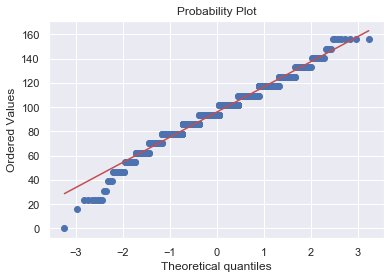

In [203]:
stats.probplot(data.index1, plot=plt)

pvalue远小于0.05，拒绝原假设，可以认为样本不符合正态分布

**KS检验**

In [204]:
normSample = np.random.normal(0, 1, 5000)

In [205]:
stats.kstest(rvs=normSample, cdf='norm', args=(normSample.mean(), normSample.std()))

KstestResult(statistic=0.007821757145022479, pvalue=0.9196882006308352)

((array([-3.63568806, -3.40036853, -3.27067228, ...,  3.27067228,
          3.40036853,  3.63568806]),
  array([-3.19032263, -3.14370823, -3.14327323, ...,  3.1877831 ,
          3.2494653 ,  3.37942287])),
 (0.9989840423615512, 0.0007358561503152488, 0.9998626980433044))

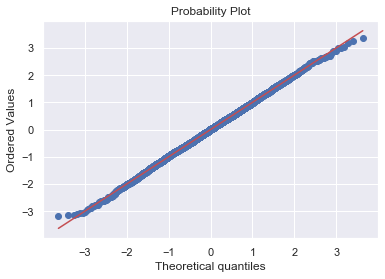

In [206]:
stats.probplot(normSample, plot=plt)

pvalue=0.862>0.05，无法拒绝原假设，可以认为样本符合正态分布

**概率图**  
如果概率图结果不是一条直线，但是符合某种规律可以对数据进行变换

In [207]:
chiDist = stats.chi2(df=10)  # 构建卡方分布总体

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

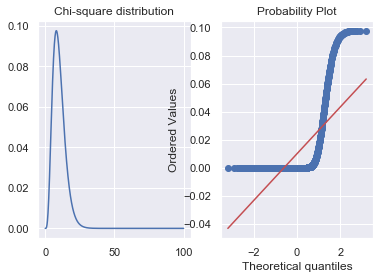

In [208]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].plot(np.arange(0, 100, 0.1), chiDist.pdf(np.arange(0, 100, 0.1)))
axs[0].set_title('Chi-square distribution')
stats.probplot(chiDist.pdf(np.arange(0, 100, 0.1)), plot=plt)

**6.2.2 二项分布检测**

In [209]:
binomSample = np.random.binomial(n=10, p=0.25, size=15)  # n:试验次数 p:成功率

In [210]:
stats.kstest(rvs=binomSample, cdf='binom', args=(10, 0.4))

KstestResult(statistic=0.4843860650666666, pvalue=0.0009188588324506737)

pvalue=0.007 < 0.05，不服从二项分布

(array([1., 3., 0., 5., 0., 4., 0., 0., 1., 1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

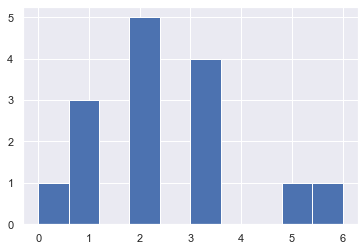

In [211]:
plt.hist(binomSample)

**6.2.3 游程检验**  

详解：https://wenku.baidu.com/view/d3255a613968011ca3009162.html?fr=search  

**如下两种方法得出相反结论**

In [212]:
data = Series(np.random.binomial(10, 0.2, size=1000))

方法一

In [213]:
import statsmodels.api as sm

In [214]:
sm.stats.runstest_1samp(data)

(-0.0034673570236315363, 0.9972334549075487)

pvalue=0.690>0.05，无法拒绝原假设，可以认为数据出现的顺序是随机的

方法二

In [215]:
from scipy.special import comb

In [216]:
def run_test(arr):
    '''
    游程检测
    H0：数据出现顺序随机
    H1：数据出现顺序不随机
    p < 0.05拒绝原假设
    '''
    # 转化为二分数据 
    arr_factorized = pd.factorize(arr)[0]  
    if (2 in arr_factorized) or (1 not in arr_factorized):
        return
    
    # m:0的个数；n：1的个数；N=m+n
    count={}
    for i in arr_factorized:
        count[i]=count.get(i,0)+1
    N, m, n = len(arr_factorized), count[0], count[1]
    
    # 获取游程个数
    r=1
    for i in range(len(arr_factorized)-1):
        if arr_factorized[i+1] != arr_factorized[i]:
            r += 1
    
    # 计算p值
    if r%2 == 0:
        p = 2 * comb(m-1, r/2-1) * comb(n-1, r/2-1) / comb(N, n)
    else:
        p = (comb(m-1,(r-1)/2-1) * comb(n-1,(r-1)/2) + comb(m-1, (r-1)/2)*comb(n-1,(r-1)/2-1))/comb(N, n)
    return {'游程数':r,'p值':p}

In [217]:
run_test(data > data.mean())

{'游程数': 439, 'p值': 0.03233187768673063}

p=0.0233<0.05，拒绝原假设，可以认为数据出现的顺序不随机

### 6.3 一个总体参数的检验

常用统计量：z统计量、t统计量、$\chi$<sup>2</sup>统计量

统计量确定：  
* 大样本：z统计量
* 小样本：由于总体σ通常难以获得，所以常用t统计量。且当n>30时，t分布和z分布非常近似，所以无论大小样本通常选用t统计量。
* 方差：$\chi$<sup>2</sup>统计量

**6.3.1 总体均值的检验**  

**t检验**  
U检验($U= (\overline{X} -μ)/(σ/ \sqrt{n})$)在实际中用处不大，因为总体σ和总体μ一样，在实际工作中常常未知。如果用样本标准差s取待总体标准差σ(t检验)，则相应的标准化统计量的变异程度要大于U，它的密度曲线看上去有些像标准正态分布，但是高峰矮一些，且尾巴长一些。正是由于t检验温和宽厚的特性，使其适用于小样本数据的检验。  
$t=\frac{\overline{X} -μ}{s/ \sqrt{n}}$, 自由度df=n-1

例：某工厂加工一种零件，其椭圆度服从正态分布，总体均值为0.081mm。如今换一种新机床加工，取200个零件进行检验，得到椭圆度均值为0.076mm，样本标准差为0.025mm，问新机床加工零件椭圆度的总体均值与之前有无差异？

H0:μ<sub>0</sub>=μ<sub>1</sub>，椭圆度均值无差别  
H1:μ<sub>0</sub>≠μ<sub>1</sub>，椭圆度均值有差别

In [4]:
%matplotlib inline
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import random
np.random.seed(987654321)

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [1]:
miu0 = 0.081
miu1 = 0.076
sigma1 = 0.025
n = 200

In [19]:
normDist = stats.norm(loc=miu0, scale=sigma1 / math.sqrt(n))
print('pvalue = ', normDist.cdf(miu1)*2)

pvalue =  0.00467773498104723


In [22]:
tDist = stats.t(loc=miu0, scale=sigma1 / math.sqrt(n), df=n-1)
print('pvalue = ', tDist.cdf(miu1)*2)

pvalue =  0.005156374545013683


由上可知，当为大样本时，t检验和z检验差别不大，且pvalue远小于0.05，可以拒绝原假设，认为新旧机器加工出来的零件椭圆度均值有显著差异

例：某电子元件的平均使用寿命为1200小时，标准差是150小时。某厂宣称采用了一种新技术使该元件的质量大大提升。线随机抽取20件样本，测得平均使用寿命为1245小时，能否说明该元件质量显著的高于规定标准？  

H0：μ≤1200，该厂元件质量未显著高于规定标准  
H1：μ> 1200，该厂元件质量显著高于规定标准

In [25]:
miu = 1200
std = 150
x = 1245
n = 20

In [30]:
tDist = stats.t(loc=1200, scale=std/math.sqrt(n), df=n-1)
print('pvalue = ', 1-tDist.cdf(x))

pvalue =  0.09776436715285408


pvalue=0.097>0.05，无法决绝原假设，还不能认为该新技术制造的元件质量高于规定标准

**6.3.2 总体比例的检验**  

涉及比例一般都采用大样本，所以选择z统计量：  
z = $\frac{p-\pi0}{\sqrt{\frac{\pi0(1-\pi0)}{n}}}$  

例：一项调查声称，某市老年人口所占比例为14.7%，该市老年人口协会随机抽取400名居民，发现其中57人的年龄在65岁以上（老年人）。该结果是否支持该是老年人口比例为14.7%的结论？  

H0：$\pi=14.7\%$，支持该结论  
H0：$\pi≠14.7\%$，不支持该结论

In [31]:
pi = 0.147
p = 57 / 400
n = 400

In [55]:
normDist = stats.norm(loc=pi, scale=math.sqrt((pi*(1-pi))/n))
print('pvalue=', normDist.cdf(p)*2)

pvalue= 0.7993709909101887


pvalue=0.799>0.05，无法拒绝原假设，该调查可以支持结论

**6.3.3 总体方差的检验**  

均值反映的是质量，而方差反映的是稳定性，方差越大波动越大

$\chi^2=\frac{(n-1)s^2}{\sigma^2}$

例：按照设计要求，某灌装饮料上下误差不超过1ml，现从某批次中随机抽取25瓶饮料，测得方差为0.866，问该批次是否满足设计要求？  

H0：$\sigma^2 \leq 1$，该批次符合要求   
H1：$\sigma^2 > 1$，该批次不符合要求

In [64]:
n = 25
s2 = 0.866
sigma2 = 1
chi2 = ((n-1)*s2)/sigma2

20.784

In [110]:
chi2Dist = stats.chi2(df=n-1)
print('pvalue = ', chi2Dist.cdf(chi2))

pvalue =  0.34856735424043667


pvalue=0.349>0.05，无法拒绝原假设，可以认为该批次符合要求

### 6.4 两个总体参数的检验

**统计量选择：**
* **均值（大样本）：**z统计量
* **均值（小样本）：**t统计量
* **比例：**z统计量
* **方差比：**F统计量

**6.4.1 两总体均值**  
1.$\sigma_1^2, \sigma_2^2$已知，且为大样本  
标准差：$\sigma_{\bar{x}_1 - \bar{x}_2} = \sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}$  
z统计量：z=$\frac{(\bar{x_1}-\bar{x}_2)-(\mu_1-\mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}$  

2.$\sigma_1^2, \sigma_2^2$未知但相等，且为小样本   
标准差：$\hat{\sigma}_{\bar{x}_1-\bar{x}_2}=s_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}$  
$s_p^2=\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}$  
t统计量：$t=\frac{(\bar{x_1}-\bar{x_2})-(\mu_1-\mu_2)}{s_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$  
自由度：df=n1+n2-2

3.$\sigma_1^2, \sigma_2^2$未知也不相等，且为小样本  
标准差：$\hat{\sigma}_{\bar{x}_1-\bar{x}_2}=\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}$  
t统计量：$t=\frac{(\bar{x_1}-\bar{x_2})-(\mu_1-\mu_2)}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$  
自由度：$f=\frac{(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2})^2}{\frac{(\frac{s_1^2}{n_1})^2}{n_1-1}+\frac{(\frac{s_2^2}{n_2})^2}{n_2-1}}$

例：有两种方式制造同一款配件，第一种方法生产配件的抗拉强度的标准差为8kg，第二种方法生产配件的标准差为10kg。现从二者中随机抽取两个样本，$n_1=32, n_2=40$，测得$\bar{x_1}=50kg, \bar{x_2}=44kg$。问这两种方式生产出来的产品平均抗拉强度是否相同？  

H0：$\mu_1=\mu_2$，平均抗拉强度无显著差异  
H0：$\mu_1\not=\mu_2$，平均抗拉强度有显著差异  

In [113]:
sigma1 = 8
sigma2 = 10
n1 = 32
n2 = 40
x1 = 50
x2 = 44

diff = x1 - x2
sigma_diff = math.sqrt(sigma1**2/n1 + sigma2**2/n2)
normDist = stats.norm(loc=0, scale=sigma_diff)

print('pvalue=', 2*normDist.sf(diff))

pvalue= 0.0046777349810472576


pvalue=0.0047远小于0.05，可以拒绝原假设，认为两种方式生产出来的产品平均抗拉强度不相同

例：科学家认为，早餐中食用谷物的人在午餐中会减少热量摄入。现随机抽取35人，按照食谱将他们分为早餐经常食用谷物和早餐不经常食用谷物两类，测得午餐热量摄入数据如下：  
经常食用谷物：568, 681, 636, 607, 555, 496, 540, 539, 529, 562, 589, 646, 596, 617, 584  
不经常食用谷物：650, 569, 622, 630, 596, 637, 628, 706, 617, 624, 563, 580, 711, 480, 688, 723, 651, 569, 709, 632  

H0：$\mu_1\geq\mu_2$  
H1：$\mu_1<\mu_2$

In [117]:
data1 = Series([568, 681, 636, 607, 555, 496, 540, 539, 529, 562, 589, 646, 596, 617, 584])
data2 = Series([650, 569, 622, 630, 596, 637, 628, 706, 617, 624, 563, 580, 711, 480, 688, 723, 651, 569, 709, 632])

t, p = stats.ttest_ind(data1, data2)
print('pvalue=', p/2)

pvalue= 0.010756822178432796


pvalue=0.01<0.05，拒绝原假设，可以认为早餐经常食用谷物会减少午餐热量消耗

**6.4.2 两总体比例之差**  

**总体比例之差相等**  
$p=\frac{x_1-x_2}{n_1+n_2}=\frac{p_1n_1+p_2n_2}{n_1+n_2}$  
$z=\frac{p_1-p_2}{\sqrt{p(1-p)(\frac{1}{n_1}+\frac{1}{n_2})}}$  

**总体比例之差不相等**  
$\pi_1-pi_2=d_0$  
$z=\frac{(p_1-p_2)-d_0}{\sqrt{\frac{p_1(1-p_1)}{n_1}+\frac{p_2(1-p_2)}{n2}}}$

例：针对麦当劳有两种观点，一种认为小学生更喜欢麦当劳，另一种认为中学生对麦当劳的喜爱不亚于小学生。现随机抽取100名中学生和小学生，测得对麦当劳的喜爱度分别为0.69和0.76。结果支持哪种观点？  

H0：$\pi_1=\pi_2$  
H1：$\pi_1\not=\pi_2$

In [136]:
p1 = 0.76
p2 = 0.69
n1 = n2 = 100
diff = p1 - p2
p = (p1*n1 + p2*n2) / (n1 + n2)
sigma = math.sqrt(p*(1-p)*(1/n1+1/n2))
normDist = stats.norm(loc=0, scale=sigma)
print('pvalue=', normDist.cdf(diff))

pvalue= 0.8661836376544595


pvalue=0.134>0.05，无法拒绝原假设，可以认为中学生对麦当劳的喜爱不亚于小学生

例：有一项研究报告，网络聊天中男生的比例至少超过女生10个百分点，现随机抽取150名男生和150名女生，其中经常聊天的男生人数为68人，女生为54人。该结果是否支持研究结论？  

H0：$\pi_1-\pi_2\geq10\%$  
H1：$\pi_1-\pi_2<10\%$

In [140]:
x1 = 68
x2 = 54
n1 = n2 = 150
p1 = x1 / n1
p2 = x2 / n2
d = 0.1
diff = p1 - p2

sigma = math.sqrt((p1*(1-p1))/n1 + (p2*(1-p2))/n2)
normDist = stats.norm(loc=d, scale=sigma)
print('pvalue=', normDist.cdf(diff))

pvalue= 0.45300610431420485


pvalue=0.45>0.05，无法拒绝原假设

**6.4.3 两总体方差之比**  

$F=\frac{s_1^2/\sigma_1^2}{s_2^2/\sigma_2^2}$  

例：两样本方差分别为2431.429、3675.461，样本量分别为15和20。两总体方差是否相等？  

H0：$\sigma_1^2=\sigma_2^2$  
H1：$\sigma_1^2\not=\sigma_2^2$ 

In [149]:
sSquare1 = 2431.429
sSquare2 = 3675.461
n1 = 15
n2 = 20
F = sSquare2 / sSquare1

fDist = stats.f(n2-1, n1-1)
print(F, '[', fDist.ppf(0.025), ',', fDist.ppf(0.975), ']')

1.511646443305562 [ 0.37779645661935185 , 2.8607215359970652 ]


F值在接受阈中，无法拒绝原假设

## 7 数值型数据的均值检验

t检验和方差分析都是典型的参数统计方法，首先需要假设统计总体的分布已知，然后服从独立性、正态性、方差齐性等适用条件之后才有用武之地。但是这些适用条件也会限制参数检验方法的使用，比如：  
* 不知道研究样本来自总体的具体分布，或已知分布与检验所要求的分布不一致
* 数据的测量尺度是名义尺度、顺序尺度，不能计算均值和方差
* 数据为连续尺度，但由于测量仪器精度的问题，两端的数值无法精确测量，使得均值、方差无法计算
* 数据不满足正态性、方差齐性等条件  

在上述参数检验方法不能适用的场合需要考虑新的分析思路，比如进行变量变换、或者对统计量进行校正。而改用非参数检验的方法最为简单、常用。  

**非参数检验**  
非参数检验并不着眼于总体参数的比较，因而和总体分布无关。它们进行的是分布位置和分布形状的比较，研究目标总体和理论总体的分布是否相同，或者各样本所在总体的分布位置是否相同，不受总体分布的限制，使用范围广。和参数检验相比，非参数检验的优势如下：  
* 稳健性：对总体分布没有约束，因而对偏离较大的数据不敏感
* 对数据的度量尺度无约束
* 适用于小样本、无分布样本、数据污染样本、混杂样本  

非参数统计也存在如下的问题：  
* 检验效能低，所以在能使用参数检验的前提下仍优先使用参数检验
* 缺少多变量建模方法：常用的非参数检验多为单因素分析方法

**使用方法总结**  
* 两个独立样本的非参数检验：Mann-Whitney U检验功效最强。其零假设和备择假设的基础是，如果两样本有差异，它们的中心位置将不同
* 两个配对样本的非参数检验：最常用Wilcoxon配对秩和检验，其基本思想是：若假设检验成立，则两组秩和不应相差太大
* 多个独立样本的非参数检验：Kruskal-Wallis检验和Median中位数检法，组间有差异时需要进一步做两两比较，且考虑α的修正问题
* 关于多个配对样本的非参数检验：可以用Fridman检验、Kendall协和系数以及Cochran检验方法，但是这些方法的检验效能都比较低

### 7.1 单组比较

**7.1.1 单样本t检验**

t检验要求**样本数据符合正态性**，如果不符合则考虑使用非参数检验
  
定义：检验一个正态分布的数据的均值和一个参考值之间的差异。如果我们知道一个正态分布总体的均值和标准差，那么我们就可以计算对应的标准误，并用来自正态分布的值来判断得到一个特定值的可能性大小。然而，在实际中我们必须从样本中估计均值和标准差；并且用来描述来自正态分布的样本均值的t分布和正态分布有一些轻微差异。

适用条件  
* 只要数据分布不是强烈的偏态，都可以使用单样本t检验  
* 对于小样本，一般要求来自正态总体
* 如果样本数据不符合正态性，可考虑使用单样本Wilcoxon检验

例：现测得某电子元件寿命如下，是否有理由认为元件的平均寿命显著大于225小时？  
寿命：159, 280, 101, 212, 224, 379, 179, 264, 222, 362, 168, 250, 149, 260, 485, 170

H0：$\mu<225$  
H1：$\mu\geq225$ 

In [1]:
%matplotlib inline
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import random
np.random.seed(987654321)

In [9]:
data = Series([159, 280, 101, 212, 224, 379, 179, 264, 222, 362, 168, 250, 149, 260, 485, 170])
std = data.std()
mean = data.mean()
n = len(data)

((array([-1.72352605, -1.26569652, -0.97848645, -0.75533862, -0.56472935,
         -0.39279634, -0.23181469, -0.07666006,  0.07666006,  0.23181469,
          0.39279634,  0.56472935,  0.75533862,  0.97848645,  1.26569652,
          1.72352605]),
  array([101, 149, 159, 168, 170, 179, 212, 222, 224, 250, 260, 264, 280,
         362, 379, 485], dtype=int64)),
 (100.2542643102913, 241.5, 0.9550076065345018))

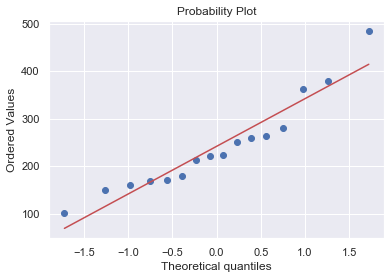

In [3]:
# 正态性检验
stats.probplot(data, plot=plt)

In [4]:
stats.shapiro(data)

(0.9199692606925964, 0.16849078238010406)

综上，样本数据基本符合正态性

In [182]:
t, pvalue = stats.ttest_1samp(data, 225)
print('pvalue=', pvalue / 2)

pvalue= 0.2569800715875837


In [10]:
tDist = stats.t(loc=225, scale=std/math.sqrt(n), df=n-1)
print('pvalue=', tDist.sf(mean))

pvalue= 0.2569800715875837


pvalue=0.257>0.05，无法拒绝原假设。

**7.1.2 Wilcoxon符号秩和检验**

非正态分布的数据中应当使用Wilcoxon符号秩和检验，而不应当使用单样本t检验。  
该方法有3个步骤：
* 计算每个观察值和感兴趣值的差异
* 忽略差异的符号，将它们按大小排序（相同的值去平均秩次）
* 将所有负/正秩次的秩次加起来，也就是那些低于/高于选定的假设值的秩次


例：广州(s0=300)2007年4月份的总信心值是否等于100？  
H0：$\mu=100$，广州2007年4月份的总信心指数等于100  
H1：$\mu\not=100$，广州2007年4月份的总信心指数不等于100 

In [11]:
data = pd.read_csv('./data/CCSS_Sample.csv')
data.head()

,time,id,s0,s2,s3,s4,s5,s7,s9,c0_1,...,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
0,200704,1,100,1,20,4,3,2,4,2,...,2500,100,200,200,200,100,100,109.349371,88.035919,121.071238
1,200704,2,100,1,24,2,3,2,8,2,...,7000,100,100,100,150,200,100,93.728032,88.035919,96.856991
2,200704,3,200,1,20,2,9,2,2,2,...,1250,100,150,150,100,100,100,93.728032,88.035919,96.856991
3,200704,4,100,2,65,3,1,1,2,2,...,1250,150,150,100,100,100,200,109.349371,154.062858,84.749867
4,200704,5,200,2,40,2,3,1,99,2,...,,100,100,100,100,150,100,85.917363,88.035919,84.749867


In [12]:
index1 = data[(data.time == 200704) & (data.s0 == 300)].index1
count = len(index1)
mean = index1.mean()
std = index1.std()
print('count = ', count)
print('mean = ', mean)
print('std = ', std)

count =  100
mean =  97.1647270171053
std =  20.808323548496936


((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

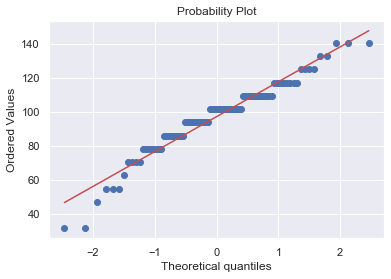

In [13]:
# 正态性检验
stats.probplot(index1, plot=plt)

In [14]:
stats.shapiro(index1)

(0.9517841935157776, 0.0010894652223214507)

综上，数据不符合正态性

In [18]:
rank, pvalue = stats.wilcoxon(index1-100)
print('pvalue=', pvalue)

pvalue= 0.5304784533810889


pvalue=0.53 > 0.05，不能拒绝原假设，可以认为广州2007年4月份的总信心指数等于100

### 7.2 两组比较

**7.2.1 独立样本t检验**

适用条件  
* 独立性：观察值之间相互独立
* 正态性：各样本来自正态总体，如不符合考虑使用MannWhitney检验
* 方差齐性：各样本所在总体方差相等  

例：装配某一零件所用的时间如下，这两种方法的装配时间有无差别？  
A：31, 34, 29, 32, 35, 38, 34, 30, 29, 32, 31, 26  
B：26, 24, 28, 29, 30, 29, 32, 26, 31, 29, 32, 28

H0：$\mu_1=\mu_2$，两种方法的装配时间无显著差别  
H1：$\mu_1\not=\mu_2$，两种方法的装配时间有显著差别

In [22]:
data1 = Series([31, 34, 29, 32, 35, 38, 34, 30, 29, 32, 31, 26])
data2 = Series([26, 24, 28, 29, 30, 29, 32, 26, 31, 29, 32, 28])

In [37]:
std1 = data1.std()
std2 = data2.std()
n1 = len(data1)
n2 = len(data2)
mean1 = data1.mean()
mean2 = data2.mean()
print('mean1 = ', mean1)
print('mean2 = ', mean2)

mean1 =  31.75
mean2 =  28.666666666666668


((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([26, 29, 29, 30, 31, 31, 32, 32, 34, 34, 35, 38], dtype=int64)),
 (3.3939466270940533, 31.75, 0.9850606005332984))

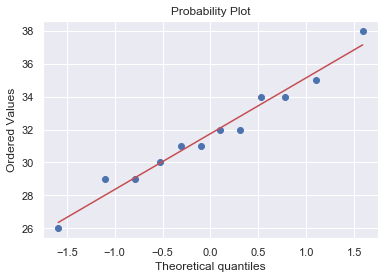

In [24]:
# 正态性检验
stats.probplot(data1, plot=plt)

In [25]:
stats.shapiro(data1)

(0.981357991695404, 0.9884795546531677)

((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([24, 26, 26, 28, 28, 29, 29, 29, 30, 31, 32, 32], dtype=int64)),
 (2.599146988264921, 28.666666666666668, 0.9788757857437278))

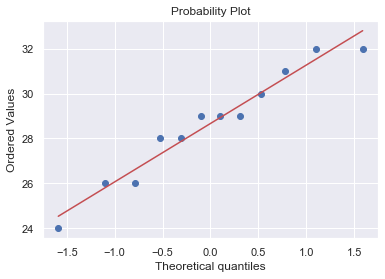

In [26]:
stats.probplot(data2, plot=plt)

In [27]:
stats.shapiro(data2)

(0.9498940706253052, 0.6354362964630127)

综上，两组数据基本符合正态性

In [28]:
# 方差齐性检验
stats.levene(data1, data2)

LeveneResult(statistic=0.6363636363636362, pvalue=0.4335571509180919)

两组数据方差齐性

In [29]:
t, pvalue = stats.ttest_ind(data1, data2)
print('pvalue=', pvalue)

pvalue= 0.014678975636689911


pvalue=0.015<0.05，拒绝原假设，可以认为种装配方法所用时间不一样，且第二种方法用时更短

**7.2.2 Mann-Whitney检验**

Mann-Whitney检验有时也被称为Wilcoxon秩和检验（不同于Wilcoxon符号秩和检验）


例：婚姻状况对信心指数有无影响?  
H0:μ<sub>1</sub>=μ<sub>2</sub>，已婚和未婚在信心指数上没有差别  
H1:μ<sub>1</sub>≠μ<sub>2</sub>，已婚和未婚在信心指数上有差别  

In [19]:
yh_index1 = data[data.s7 == 1].index1  # 已婚总信心指数
wh_index1 = data[data.s7 == 2].index1  # 未婚总信心指数

In [20]:
print('已婚 mean = ', yh_index1.mean())
print('已婚 std = ', yh_index1.std())
print('已婚 count = ', len(yh_index1))
print('未婚 mean = ', wh_index1.mean())
print('未婚 std = ', wh_index1.std())
print('未婚 count = ', len(wh_index1))

已婚 mean =  95.03310636253177
已婚 std =  21.28248676522793
已婚 count =  790
未婚 mean =  98.28235865819536
未婚 std =  19.959823652151297
未婚 count =  343


((array([-3.12899827e+00, -2.85842283e+00, -2.70706957e+00, -2.60014346e+00,
         -2.51661103e+00, -2.44764232e+00, -2.38866075e+00, -2.33697690e+00,
         -2.29087124e+00, -2.24917541e+00, -2.21105809e+00, -2.17590599e+00,
         -2.14325327e+00, -2.11273748e+00, -2.08407088e+00, -2.05702110e+00,
         -2.03139765e+00, -2.00704239e+00, -1.98382255e+00, -1.96162549e+00,
         -1.94035486e+00, -1.91992752e+00, -1.90027126e+00, -1.88132290e+00,
         -1.86302688e+00, -1.84533405e+00, -1.82820069e+00, -1.81158779e+00,
         -1.79546032e+00, -1.77978675e+00, -1.76453860e+00, -1.74969000e+00,
         -1.73521746e+00, -1.72109949e+00, -1.70731646e+00, -1.69385034e+00,
         -1.68068456e+00, -1.66780382e+00, -1.65519399e+00, -1.64284199e+00,
         -1.63073567e+00, -1.61886374e+00, -1.60721570e+00, -1.59578172e+00,
         -1.58455264e+00, -1.57351988e+00, -1.56267539e+00, -1.55201162e+00,
         -1.54152148e+00, -1.53119828e+00, -1.52103573e+00, -1.51102788e+00,

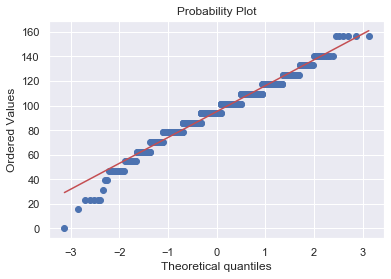

In [30]:
# 正态性检验
stats.probplot(yh_index1, plot=plt)

In [31]:
stats.shapiro(yh_index1)

(0.974041223526001, 1.228973728339966e-10)

((array([-2.87520962, -2.58280509, -2.41756432, -2.2999778 , -2.20757113,
         -2.13088171, -2.06499372, -2.0070128 , -1.95508528, -1.90794975,
         -1.86470749, -1.82469464, -1.7874064 , -1.75244958, -1.7195117 ,
         -1.68834019, -1.65872783, -1.63050242, -1.60351926, -1.57765554,
         -1.55280607, -1.52888007, -1.5057986 , -1.48349257, -1.46190117,
         -1.44097057, -1.42065286, -1.40090525, -1.38168932, -1.36297046,
         -1.34471736, -1.32690161, -1.30949734, -1.29248094, -1.27583077,
         -1.25952697, -1.24355127, -1.2278868 , -1.21251796, -1.19743031,
         -1.18261042, -1.16804581, -1.15372485, -1.13963668, -1.12577114,
         -1.11211872, -1.0986705 , -1.0854181 , -1.07235363, -1.05946968,
         -1.04675924, -1.03421569, -1.02183279, -1.00960463, -0.99752559,
         -0.98559037, -0.97379393, -0.96213146, -0.9505984 , -0.93919042,
         -0.92790338, -0.91673333, -0.90567651, -0.89472931, -0.8838883 ,
         -0.87315019, -0.86251183, -0.

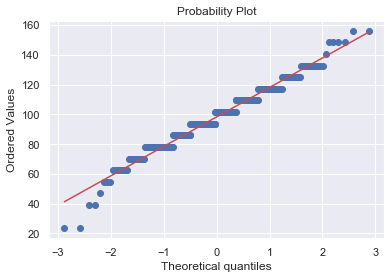

In [32]:
stats.probplot(wh_index1, plot=plt)

In [33]:
stats.shapiro(wh_index1)

(0.9754796028137207, 1.4142003237793688e-05)

综上，两组数据不符合正态性

In [34]:
u, pvalue = stats.mannwhitneyu(yh_index1, wh_index1)
print('pvalue=', pvalue)

pvalue= 0.013551574476997279


pvalue = 0.014 < 0.05，拒绝原假设，可以认为已婚和未婚人士在总信心指数上存在显著性差别，且未婚人士相对更有信心

**7.2.3 配对样本**

前后差值符合正态性则使用单样本t检验，如不符合正态性考虑使用单样本Wilcoxon检验  

常见的配对设计：
* 1.同一被试处理前后的数据
* 2.同一被试两个部位的数据
* 3.同一样本用两种方法检验的结果
* 4.配对的两个受试对象分别接受两种处理后的数据

1是用来推断处理有无作用，2、3、4的目的则是推断两种方法/处理的结果有无差别  

原理：如果两种处理实际上没有差异，则差值的总体均值应当为0；如果有差异则差值的均值应当原理0  
t=$\bar{d}$/s/$\sqrt{n}$  df=n-1(n为对子数)  

例：2007年4月和2007年12月同一受访家庭在信心指数上有无明显变化？  
H0:μ<sub>d</sub>=0，两个时间点的信心指数无差异  
H1:μ<sub>d</sub>≠0，两个时间点的信心指数有差异  

In [41]:
data = pd.read_csv('./data/CCSS_pair.csv')
data.head()

,time,id,s2,s3,Qa3,Qa4,Qa8,Qa10,Qa16,index1,index1a,index1b,Qa3n,Qa4n,Qa8n,Qa10n,Qa16n,index1n,index1an,index1bn
0,200704,22,2,59,100,100,100,100,50,70.296024,66.026939,72.642743,50,100,100,100,100,70.296024,66.026939,72.642743
1,200704,40,2,28,150,150,150,150,100,109.349371,110.044898,108.964114,150,100,100,200,100,101.538702,110.044898,96.856991
2,200704,45,1,55,100,50,50,100,200,78.106694,132.053878,48.428495,150,100,150,150,100,101.538702,110.044898,96.856991
3,200704,69,1,26,150,200,150,50,100,101.538702,110.044898,96.856991,150,100,150,200,200,124.970710,154.062858,108.964114
4,200704,98,1,63,100,200,150,150,100,109.349371,88.035919,121.071238,150,150,100,0,100,78.106694,110.044898,60.535619


In [42]:
d1 = data.index1 - data.index1n    # index1的配对差值
d2 = data.index1a - data.index1an  # indexla的配对差值
d3 = data.index1b - data.index1bn  # indexlb的配对差值

1.总信心指数

In [43]:
print('count = ', len(d1))
print('mean = ', d1.mean())
print('std = ', d1.std())
print('skew = ', d1.skew())

count =  88
mean =  2.751485802333225
std =  22.21976656288466
skew =  0.029154875301917446


((array([-2.41601382, -2.07398517, -1.87557193, -1.731585  , -1.6165249 ,
         -1.51958913, -1.43513839, -1.35983842, -1.29154588, -1.2287972 ,
         -1.17054616, -1.1160175 , -1.06461975, -1.01589071, -0.9694618 ,
         -0.92503399, -0.88236099, -0.84123728, -0.80148934, -0.76296913,
         -0.72554915, -0.68911866, -0.65358068, -0.61884968, -0.58484969,
         -0.55151282, -0.51877798, -0.48658991, -0.45489835, -0.42365729,
         -0.39282443, -0.36236063, -0.33222953, -0.30239712, -0.2728315 ,
         -0.24350251, -0.21438154, -0.18544129, -0.15665555, -0.12799906,
         -0.09944732, -0.07097643, -0.04256298, -0.01418385,  0.01418385,
          0.04256298,  0.07097643,  0.09944732,  0.12799906,  0.15665555,
          0.18544129,  0.21438154,  0.24350251,  0.2728315 ,  0.30239712,
          0.33222953,  0.36236063,  0.39282443,  0.42365729,  0.45489835,
          0.48658991,  0.51877798,  0.55151282,  0.58484969,  0.61884968,
          0.65358068,  0.68911866,  0.

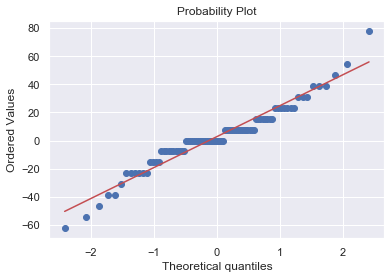

In [44]:
# 正态性检验
stats.probplot(d1, plot=plt)

In [45]:
stats.shapiro(d1)

(0.9564122557640076, 0.004841343965381384)

数据不符合正态性，使用Wilcoxon符号秩和检验

In [47]:
rank, pvalue = stats.wilcoxon(d1-0)
print('pvalue=', pvalue)

pvalue= 0.22886316504525717


pvalue=0.229>0.05，无法拒绝原假设。可以认为两个时间点的总信心指数无差异

2.现状指数

In [48]:
print('count = ', len(d2))
print('mean = ', d2.mean())
print('std = ', d2.std())
print('skew = ', d2.skew())

count =  88
mean =  -4.001632666127802
std =  31.57744979454671
skew =  -0.6044532894635383


((array([-2.41601382, -2.07398517, -1.87557193, -1.731585  , -1.6165249 ,
         -1.51958913, -1.43513839, -1.35983842, -1.29154588, -1.2287972 ,
         -1.17054616, -1.1160175 , -1.06461975, -1.01589071, -0.9694618 ,
         -0.92503399, -0.88236099, -0.84123728, -0.80148934, -0.76296913,
         -0.72554915, -0.68911866, -0.65358068, -0.61884968, -0.58484969,
         -0.55151282, -0.51877798, -0.48658991, -0.45489835, -0.42365729,
         -0.39282443, -0.36236063, -0.33222953, -0.30239712, -0.2728315 ,
         -0.24350251, -0.21438154, -0.18544129, -0.15665555, -0.12799906,
         -0.09944732, -0.07097643, -0.04256298, -0.01418385,  0.01418385,
          0.04256298,  0.07097643,  0.09944732,  0.12799906,  0.15665555,
          0.18544129,  0.21438154,  0.24350251,  0.2728315 ,  0.30239712,
          0.33222953,  0.36236063,  0.39282443,  0.42365729,  0.45489835,
          0.48658991,  0.51877798,  0.55151282,  0.58484969,  0.61884968,
          0.65358068,  0.68911866,  0.

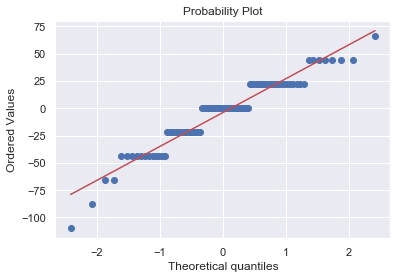

In [49]:
# 正态性检验
stats.probplot(d2, plot=plt)

In [50]:
stats.shapiro(d2)

(0.9375932812690735, 0.0003656968765426427)

数据不符合正态性，使用Wilcoxon符号秩和检验

In [52]:
rank, pvalue = stats.wilcoxon(d2-0)
print('pvalue=', pvalue)

pvalue= 0.23819556041164125


pvalue=0.238>0.05，无法拒绝原假设。可以认为两个时间点的现状指数无差异。

3.预期指数

In [53]:
print('count = ', len(d3))
print('mean = ', d3.mean())
print('std = ', d3.std())
print('skew = ', d3.skew())

count =  88
mean =  6.466304773728868
std =  24.69302442320461
skew =  0.48207268788757035


((array([-2.41601382, -2.07398517, -1.87557193, -1.731585  , -1.6165249 ,
         -1.51958913, -1.43513839, -1.35983842, -1.29154588, -1.2287972 ,
         -1.17054616, -1.1160175 , -1.06461975, -1.01589071, -0.9694618 ,
         -0.92503399, -0.88236099, -0.84123728, -0.80148934, -0.76296913,
         -0.72554915, -0.68911866, -0.65358068, -0.61884968, -0.58484969,
         -0.55151282, -0.51877798, -0.48658991, -0.45489835, -0.42365729,
         -0.39282443, -0.36236063, -0.33222953, -0.30239712, -0.2728315 ,
         -0.24350251, -0.21438154, -0.18544129, -0.15665555, -0.12799906,
         -0.09944732, -0.07097643, -0.04256298, -0.01418385,  0.01418385,
          0.04256298,  0.07097643,  0.09944732,  0.12799906,  0.15665555,
          0.18544129,  0.21438154,  0.24350251,  0.2728315 ,  0.30239712,
          0.33222953,  0.36236063,  0.39282443,  0.42365729,  0.45489835,
          0.48658991,  0.51877798,  0.55151282,  0.58484969,  0.61884968,
          0.65358068,  0.68911866,  0.

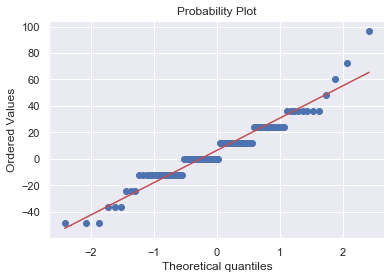

In [55]:
# 正态性检验
stats.probplot(d3, plot=plt)

In [56]:
stats.shapiro(d3)

(0.9489641785621643, 0.0016706845490261912)

数据不符合正态性，使用Wilcoxon符号秩和检验

In [58]:
rank, pvalue = stats.wilcoxon(d3-0)
print('pvalue=', pvalue)

pvalue= 0.01682168621391383


pvalue=0.017<0.05，拒绝原假设。可以认为两个时间点的预期指数有差异

**数据不符合适用条件**  
上述数据符合独立性和方差齐次性，但是不符合正态性。对于不符合适用条件的数据可以考虑从以下几个方向来应对：  
* **样本量均衡：**在用于比较的各组在样本量上基本相等时，能在一定程度上弥补正态性或方差齐性得不到满足时所带来的影响。例如，在样本量相差不大时，只要最大/最小方差之比小于3，则分析结果都是稳定的。
* **变量转换：**通过对原始数据进行数学转换，有可能使其转换后分布满足或者近似满足正态性/方差齐性的要求。  
    1.对数转换：y=lgX    
    2.平方根转换：可用于服从泊松分布的数据、轻度偏态的数据、样本方差与均数呈正相关的数据、以及观察变量为率且取值在0%-20%或80%-100%之间的数据  
    3.平方根反正弦转换：将原始资料的平方根反正弦变换值y=sin<sup>-1</sup>$\sqrt{X}$，平方根反正弦函数可用于原始数据为率，且取值广泛的数据  
    4.平方变换：常用于方差与均值呈反比的数据或资料呈左偏时  
    5.倒数变换：用于方差与均值的平方呈正比时，并且要求资料中没有小于0的数据  
    6.Box-Cox变换：  
    f(y)=y<sup>λ</sup>    λ≠0  
    f(y)=ln(y)    λ=0  
    7.当观察指标为率，且取值在30%-70%之间时，一般不考虑变换  
* **矫正检验：**对于不是特别严重的方差不齐问题，无论是t检验还是单因素方差分析都提供了校正检验方法，可以给出考虑了方差差异之后更加稳健的结果。但是当组间方差差异过大时，校正的结果也是不可信的。  
* **非参数方法：**几乎是数据不符合方法适用条件的最后一招，和t检验和方差检验等参数检验相比，非参数检验在数据分布特征以及方差大小方面没有限制，因此可以很好的应对分析需求，以秩和检验最为常用

**例题**

1.从一根木头里抽取5根，测的直径为12.3 12.8 12.4 12.1 12.7(单位cm)，能否认为这批木头的平均直径为12.3cm？  

分析：该题适用于独立样本t检验，但由于为小样本需要对样本的正态性进行检验  

假设：  
H0:μ=12.3，这批木头的平均直径等于12.3cm  
H1:μ≠12.3，这批木头的平均直径不等于12.3cm  

In [59]:
diam = Series([12.3, 12.8, 12.4, 12.1, 12.7])

In [60]:
# 正态性检验
stats.shapiro(diam)

(0.9506312012672424, 0.7416971921920776)

((array([-1.12899754, -0.48565271,  0.        ,  0.48565271,  1.12899754]),
  array([12.1, 12.3, 12.4, 12.7, 12.8])),
 (0.3259064141902919, 12.459999999999999, 0.9831015122844433))

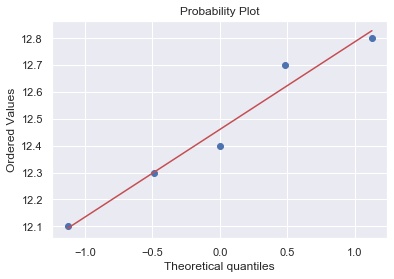

In [61]:
stats.probplot(diam, dist='norm', plot=plt)

样本符合正态性

In [63]:
# 单样本t检验
t, pvalue = stats.ttest_1samp(diam, 12.3)
print('pvalue=', pvalue)

pvalue= 0.28213534548563457


pvalue=0.282>0.05，无法拒绝原假设。可以认为这批木头的均值为12.3

2.用某药治疗10名高血压病人，对每一位病人治疗前后的舒张压(mmHg)进行检测，结果如下，请问该药有无降压作用？另外从研究设计的角度来看，该设计存在怎样的问题？  

| 编号   | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    | 10   |
| ------ | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| 治疗前 | 120  | 127  | 141  | 107  | 110  | 114  | 115  | 138  | 127  | 122  |
| 治疗后 | 123  | 108  | 120  | 107  | 100  | 98   | 102  | 152  | 104  | 107  |

分析：该题适用于配对样本t检验(右尾检验)，由于对数小于30为小样本，需要对差值进行正态性检验  

假设：  
H0:μ<sub>1</sub><=μ<sub>2</sub>，该药无降压作用  
H1:μ<sub>1</sub>>μ<sub>2</sub>，该药有降压作用  

In [245]:
pre_data = Series([120, 127, 141, 107, 110, 114, 115, 138, 127, 122])
after_data = Series([123, 108, 120, 107, 100, 98, 102, 152, 104, 107])
d = pre_data - after_data

In [246]:
# 正态性检验
stats.shapiro(d)

(0.8995606899261475, 0.21667484939098358)

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-14,  -3,   0,  10,  13,  15,  16,  19,  21,  23], dtype=int64)),
 (12.390249630148576, 10.0, 0.9509336497583972))

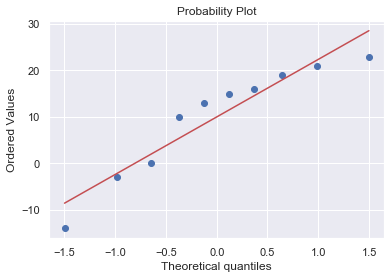

In [247]:
stats.probplot(d, dist='norm', plot=plt)

差值通过了S-W检验，但是在分布上符合某种特性需要进行转换

In [248]:
d_transformed = d.apply(lambda x: -4.2788*(x**2) + 12.342*x + 13.54)

In [249]:
# 正态性检验
stats.shapiro(d_transformed)

(0.9647491574287415, 0.8383581042289734)

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-1966.0792, -1614.2288, -1296.6088,  -997.8928,  -884.3608,
          -764.06  ,  -549.1312,  -290.92  ,   -61.9952,    13.54  ])),
 (703.3277919109026, -841.1736800000001, 0.9893083341237332))

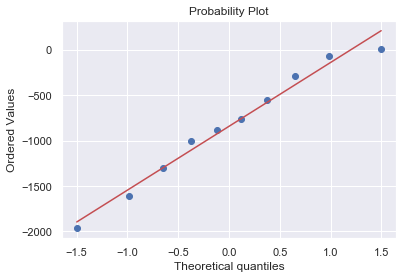

In [250]:
stats.probplot(d_transformed, dist='norm', plot=plt)

转换后数值符合正态性

In [251]:
stats.ttest_1samp(d_transformed, 13.54)

Ttest_1sampResult(statistic=-4.144051605602341, pvalue=0.0025064727770037166)

pvalue=0.00125<0.05，拒绝原假设。该药物有降压作用

3.比较两批电子器材的电阻，随机抽取的样本测试电阻如题2所示，比较凉皮电子器材的电阻是否相等？ 

|      | 1     | 2     | 3     | 4     | 5     | 6     | 7     |
| ---- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| A    | 0.140 | 0.138 | 0.143 | 0.142 | 0.144 | 0.148 | 0.137 |
| B    | 0.135 | 0.140 | 0.142 | 0.136 | 0.138 | 0.140 | 0.141 |

分析：适用于独立样本t检验，需要考虑独立性、方差齐性以及正态性。由于为小样本，需要对正态性进行检验  

假设：  
H0:μ<sub>1</sub>=μ<sub>1</sub>，两批器材电阻相等  
H1:μ<sub>1</sub>≠μ<sub>1</sub>，两批器材电阻不相等  

In [252]:
a = Series([0.140, 0.138, 0.143, 0.142, 0.144, 0.148, 0.137])
b = Series([0.135, 0.140, 0.142, 0.136, 0.138, 0.140, 0.141])

In [253]:
# 正态性检验
stats.shapiro(a)

(0.9684268832206726, 0.8868914842605591)

((array([-1.31487275, -0.74397649, -0.3471943 ,  0.        ,  0.3471943 ,
          0.74397649,  1.31487275]),
  array([0.137, 0.138, 0.14 , 0.142, 0.143, 0.144, 0.148])),
 (0.00415513528186487, 0.14171428571428574, 0.9855294998387956))

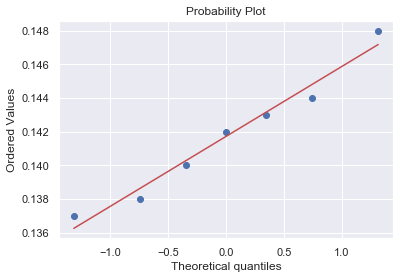

In [254]:
stats.probplot(a, dist='norm', plot=plt)

In [255]:
stats.shapiro(b)

(0.9284687638282776, 0.5379530787467957)

((array([-1.31487275, -0.74397649, -0.3471943 ,  0.        ,  0.3471943 ,
          0.74397649,  1.31487275]),
  array([0.135, 0.136, 0.138, 0.14 , 0.14 , 0.141, 0.142])),
 (0.002833696889385193, 0.13885714285714287, 0.9718638527842923))

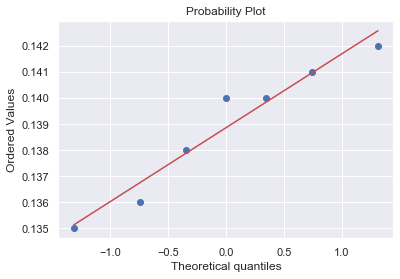

In [256]:
stats.probplot(b, dist='norm', plot=plt)

a,b均基本符合正态性

In [257]:
# 方差齐性检验
stats.levene(a, b)

LeveneResult(statistic=0.6067415730337028, pvalue=0.4511052979403858)

pvalue=0.451>0.05，无法拒绝原假设，可以认为方差齐

In [258]:
# 独立样本t检验
stats.ttest_rel(a, b)

Ttest_relResult(statistic=1.657104529998325, pvalue=0.1485745930796803)

pvalue=0.149>0.05，无法拒绝原假设，可以认为两批电线电阻相等

## 7.3 多组比较

**7.3.1 单因素方差分析**

**基本思想：** 在单因素方差的分析中，整个样本的变异可以被看成由如下两部分构成：  

总变异=随即变异+处理因素导致的变异  
    
其中，随机变异是永远存在的，处理因素导致的变异就是要研究的目标。只要证明它不为0，就等同于证明了处理因素的确存在影响。在样本数据中，总变异可以分解为两项：组内变异以及组间变异。  

总变异=组内变异+组间变异  

组内变异是由随机因素造成的，如果组间变异不存在，也即处理因素不造成影响，那么μ<sub>1</sub>=μ<sub>2</sub>=...。分组间的随即变异也应当接近于组内变异,F应当接近于1  
    
$F_{k-1,N-k}=\frac{SS_b/(k-1)}{SS_w/(N-k)}$


**适用条件：**  
* 独立性
* 正态性
* 方差齐性  

例：使用3种方法对员工进行培训，培训结束后3组员工组装时间如下。培训方法是否对产品组装时间有影响？  
A：8.8, 9.3, 8.7, 9.0, 8.6, 8.3, 9.5, 9.4, 9.2  
B：8.2, 6.7, 7.4, 8.0, 8.2, 7.8, 8.8, 8.4, 7.9  
C：8.6, 8.5, 9.1, 8.2, 8.3, 7.9, 9.9, 9.4

H0：$\mu_1=\mu_2=\mu_3$，培训方式对产品组装时间无影响  
H1：$\mu_1, \mu_2, \mu_3$不全相等，培训方式对产品组装时间有影响

例：2007年4月与2007、2008、2009年12月四个时间点的总信心指数是否存在差异?  
H0：μ<sub>1</sub>=μ<sub>2</sub>=μ<sub>3</sub>=μ<sub>4</sub>,四个时间点的总信心指数相等   
H1：四个时间点的总信心指数不相等

In [75]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [135]:
data = DataFrame()
A = [8.8, 9.3, 8.7, 9.0, 8.6, 8.3, 9.5, 9.4, 9.2]
B = [8.2, 6.7, 7.4, 8.0, 8.2, 7.8, 8.8, 8.4, 7.9]
C = [8.6, 8.5, 9.1, 8.2, 8.3, 7.9, 9.9, 9.4]
data['Value'] =  A + B + C
data['Type'] = ['A'] * len(A) + ['B'] * len(B) + ['C'] * len(C)

((array([-1.44573845, -0.91666807, -0.56381839, -0.2709378 ,  0.        ,
          0.2709378 ,  0.56381839,  0.91666807,  1.44573845]),
  array([8.3, 8.6, 8.7, 8.8, 9. , 9.2, 9.3, 9.4, 9.5])),
 (0.43875921689742564, 8.97777777777778, 0.9859828768589218))

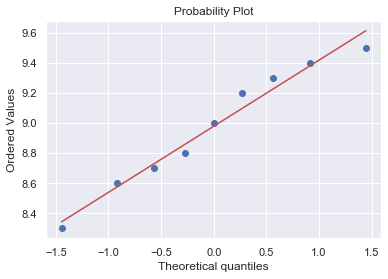

In [136]:
# 正态性检验
stats.probplot(A, plot=plt)

((array([-1.44573845, -0.91666807, -0.56381839, -0.2709378 ,  0.        ,
          0.2709378 ,  0.56381839,  0.91666807,  1.44573845]),
  array([6.7, 7.4, 7.8, 7.9, 8. , 8.2, 8.2, 8.4, 8.8])),
 (0.6411593709953652, 7.933333333333333, 0.9638069320059198))

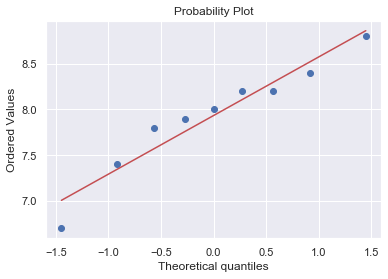

In [91]:
stats.probplot(B, plot=plt)

((array([-1.38519806, -0.83757156, -0.46579419, -0.15039337,  0.15039337,
          0.46579419,  0.83757156,  1.38519806]),
  array([7.9, 8.2, 8.3, 8.5, 8.6, 9.1, 9.4, 9.9])),
 (0.7278545786241857, 8.7375, 0.9763499334695095))

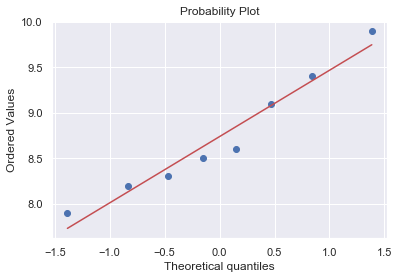

In [90]:
stats.probplot(C, plot=plt)

In [80]:
data.groupby('Type').apply(stats.shapiro)

Type
A    (0.9582281708717346, 0.7796039581298828)
B    (0.9466509222984314, 0.6533677577972412)
C    (0.9474440217018127, 0.6854446530342102)
dtype: object

综上，数据符合正态性

In [89]:
stats.levene(A, B, C)

LeveneResult(statistic=0.5123617004159042, pvalue=0.6057571609585921)

pvalue=0.606>0.05，方差齐性

In [98]:
model = ols(formula='Value~Type',data=data).fit()
anova_table = anova_lm(model, typ = 2)
print(anova_table)

            sum_sq    df         F    PR(>F)
Type      5.349156   2.0  8.274518  0.001962
Residual  7.434306  23.0       NaN       NaN


pvalue=0.001962<0.05，拒绝原假设，可以认为培训方式对产品组装时间有影响

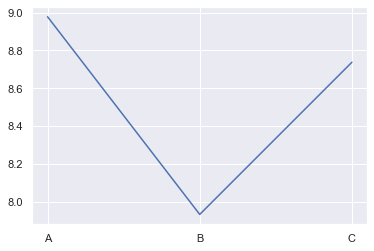

In [103]:
plt.plot(data.groupby('Type').mean())

**均数间的多重比较**  
上述结果虽然给出了四个时间点均值不同的结果，但是并不知道四个时间点均有差别还是某一时间点和其他时间点有差别。虽然各组均值可以给出大致的趋势变化，但是没有相应的假设检验结果予以确认，这时就需要均数简的多重比较来进行考察。（前提是拒绝了H0）

两两比较的关键问题是控制好一类错误：
* **CER：**比较误差，即每做一次比较犯一类错误的概率
* **EERC：**在完全无效假设下的实验错误率，即在H0成立时做完全比较所犯一类错误的概率
* **MEER：**最大实验误差，即在任何完全或部分无效假设下，做完全部比较所犯一类错误的最大概率值

当无效假设实际上成立时，各组间均值无差别，k个组完全两两比较的次数c=k(k-1)/2，做完所有比较犯一类错误的概率为1-(1-α<sub>ij</sub>)<sup>c</sup>，即EERC，方差分析的实质就是控制EERC。由上述公式反推出每一个检验所用的α<sub>ij</sub>=1-(1-α)<sup>1-c</sup>,这种比较方式称为Sidak校正。   


显然，Sidak校正针对完全无效假设，在实际问题中有些组均数相同有些不同，因此因此控制MEER更合适。Bonferroni不等式被广泛用于此目的，它通过控制CER，使MEER在所设定的水平内，公式为：CER=α/c。只要CER(即α<sub>ij</sub>)小于α/c，则MEER不会大于α。  

多重比较方法(最敏感到最保守)：
* LSD：一般用于计划好的多重比较
* Sidak方法：Sidak校正在LSD方法上的应用，P<sub>Sidak</sub>=1-(1-P<sub>LSD</sub>)C，显然Sidak方法比LSD方法更保守
* Bonferroni方法：Bonferroni校正在LSD方法上的应用，P<sub>Bonferroni</sub>=P<sub>LSD</sub>C，显然Bonferroni方法比Sidak方法更保守
* Scheffe法：对多组数据间的线性组合是否为0进假设检验，多用于进行比较的两组间样本含量不等时
* Dunnett法：常用于多个实验组和一个对照组比较  


多重比较方法(寻找同质亚组)：  
* S-N-K法：根据预先指定的准则将各组均数分为多个子集，采用Studentize Range分布进行假设检验
* Tukey法：Tukey法也是采用Studentize Range分布进行假设检验，要求各组样本含量相同。与S-N-K法相比，它要求MEER不超过α
* Duncan法：与S-N-K法类似，不过统计量服从Duncan's Multiple Range分布  

两两必将方法选择：  
* 如果两组均数间的比较是独立的，或者虽然有多个样本均数，但事先已计划好要做某几对均数的比较，则不管方差分析结果如何，都应该进行比较。一般采用LSD法或Bonferroni法
* 如果事先未计划进行多重比较，在方差分析得到有统计学意义的F值后，可以利用多重比较进行探索性数据分析。需要对多个实验组和一个对照组进行比较时，可以采用Dunnett方法；需要进行任意两组的比较而各组样本含量相同时，可以采用Tukey方法；若样本含量彼此不同可以采用Scheffe方法。若事先未计划进行多重比较而且方差分析未检验出差别，则不应当进行多重比较。
* 绘制均值图

**Turkey检验**

In [104]:
from statsmodels.stats.multicomp import MultiComparison

In [137]:
mc = MultiComparison(data.Value, data.Type)

In [138]:
tukey_result = mc.tukeyhsd(alpha = 0.5)
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B  -1.0444  0.002 -1.3505 -0.7384   True
     A      C  -0.2403 0.6552 -0.5557  0.0752  False
     B      C   0.8042 0.0206  0.4887  1.1196   True
----------------------------------------------------


综上，A、C两种方法之间没有显著差异，经B方法培训过的装配用时要小于A、C两方法

**Bonferroni校正**

In [145]:
mc.allpairtest(stats.ttest_ind, method='bonf')[0]

group1,group2,stat,pval,pval_corr,reject
A,B,4.2961,0.0006,0.0017,True
A,C,0.9034,0.3806,1.0,False
B,C,-2.5912,0.0205,0.0614,False


**Holm-Bonferroni校正**  

Bonferroni校正比较保守，容易错误的接受零假设。用的更多的是Holm's-Bonferroni，比前者要更容易发现显著差异。

In [146]:
mc.allpairtest(stats.ttest_ind, method='holm')[0]

group1,group2,stat,pval,pval_corr,reject
A,B,4.2961,0.0006,0.0017,True
A,C,0.9034,0.3806,0.3806,False
B,C,-2.5912,0.0205,0.0409,True


**7.3.2 Kruskal-Waillis检验**  

适用于3组以上的非参数统计，当无效假设是真时，Kruskal-Waillis的检验统计量服从卡方检验

In [75]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.

In [107]:
# 读取数据
data = pd.read_csv('./data/CCSS_Sample.csv')
data.head()

,time,id,s0,s2,s3,s4,s5,s7,s9,c0_1,...,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
0,200704,1,100,1,20,4,3,2,4,2,...,2500,100,200,200,200,100,100,109.349371,88.035919,121.071238
1,200704,2,100,1,24,2,3,2,8,2,...,7000,100,100,100,150,200,100,93.728032,88.035919,96.856991
2,200704,3,200,1,20,2,9,2,2,2,...,1250,100,150,150,100,100,100,93.728032,88.035919,96.856991
3,200704,4,100,2,65,3,1,1,2,2,...,1250,150,150,100,100,100,200,109.349371,154.062858,84.749867
4,200704,5,200,2,40,2,3,1,99,2,...,,100,100,100,100,150,100,85.917363,88.035919,84.749867


In [108]:
d1 = Series(data[data.time==200704].index1.values)
d2 = Series(data[data.time==200712].index1.values)
d3 = Series(data[data.time==200812].index1.values)
d4 = Series(data[data.time==200912].index1.values)

In [109]:
print('d1')
print('count = ', len(d1))
print('mean = ', d1.mean())
print('std = ', d1.std())
print('d2')
print('count = ', len(d2))
print('mean = ', d2.mean())
print('std = ', d2.std())
print('d3')
print('count = ', len(d3))
print('mean = ', d3.mean())
print('std = ', d3.std())
print('d4')
print('count = ', len(d4))
print('mean = ', d4.mean())
print('std = ', d4.std())

d1
count =  300
mean =  98.33632742326009
std =  18.920735302664266
d2
count =  304
mean =  94.1391203541933
std =  22.71719052465236
d3
count =  304
mean =  90.43932959791495
std =  20.592400536644412
d4
count =  239
mean =  101.99623061671278
std =  19.733511865920214


In [110]:
# 正态性检验
stats.shapiro(d1)

(0.966885507106781, 2.2581652956432663e-06)

((array([-2.83270147, -2.5363011 , -2.36847471, -2.24887944, -2.15478411,
         -2.07661294, -2.00938931, -1.95018201, -1.89711324, -1.84890481,
         -1.80464581, -1.76366326, -1.72544529, -1.68959313, -1.65578984,
         -1.62377915, -1.5933508 , -1.56433003, -1.53656998, -1.50994596,
         -1.48435118, -1.45969344, -1.43589258, -1.41287842, -1.39058917,
         -1.36897015, -1.34797267, -1.32755325, -1.30767283, -1.28829622,
         -1.26939159, -1.25093005, -1.23288529, -1.21523328, -1.19795202,
         -1.1810213 , -1.16442252, -1.1481385 , -1.13215338, -1.11645243,
         -1.10102199, -1.08584934, -1.07092263, -1.0562308 , -1.04176348,
         -1.02751099, -1.01346422, -0.99961462, -0.98595415, -0.97247524,
         -0.95917073, -0.94603388, -0.93305829, -0.92023793, -0.90756706,
         -0.89504026, -0.88265235, -0.87039844, -0.85827385, -0.84627414,
         -0.83439507, -0.82263259, -0.81098284, -0.79944213, -0.78800692,
         -0.77667384, -0.76543965, -0.

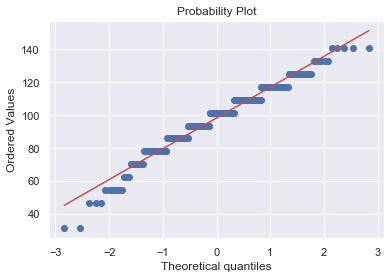

In [111]:
stats.probplot(d1, plot=plt)

In [112]:
stats.shapiro(d2)

(0.9562035202980042, 6.700251020674841e-08)

((array([-2.8369283 , -2.54093001, -2.37336443, -2.25397215, -2.16004769,
         -2.08202665, -2.0149385 , -1.95585573, -1.90290296, -1.85480368,
         -1.81064821, -1.76976449, -1.73164134, -1.69588058, -1.6621657 ,
         -1.6302408 , -1.59989593, -1.5709566 , -1.54327615, -1.51673009,
         -1.49121178, -1.46662917, -1.44290222, -1.41996086, -1.39774341,
         -1.37619525, -1.3552678 , -1.33491763, -1.31510575, -1.29579703,
         -1.27695969, -1.25856488, -1.24058635, -1.22300011, -1.20578419,
         -1.18891842, -1.17238423, -1.15616448, -1.14024332, -1.12460607,
         -1.10923908, -1.09412966, -1.07926598, -1.064637  , -1.05023237,
         -1.03604243, -1.0220581 , -1.00827083, -0.99467261, -0.98125587,
         -0.96801348, -0.95493871, -0.94202517, -0.92926685, -0.91665803,
         -0.90419328, -0.89186745, -0.87967566, -0.86761324, -0.85567575,
         -0.84385898, -0.83215888, -0.8205716 , -0.80909347, -0.79772095,
         -0.78645068, -0.77527943, -0.

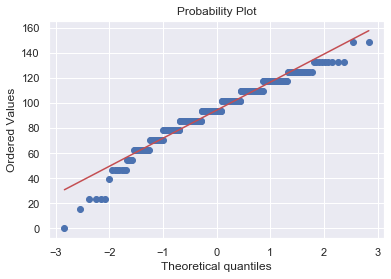

In [113]:
stats.probplot(d2, plot=plt)

In [114]:
stats.shapiro(d3)

(0.977051854133606, 8.660431194584817e-05)

((array([-2.8369283 , -2.54093001, -2.37336443, -2.25397215, -2.16004769,
         -2.08202665, -2.0149385 , -1.95585573, -1.90290296, -1.85480368,
         -1.81064821, -1.76976449, -1.73164134, -1.69588058, -1.6621657 ,
         -1.6302408 , -1.59989593, -1.5709566 , -1.54327615, -1.51673009,
         -1.49121178, -1.46662917, -1.44290222, -1.41996086, -1.39774341,
         -1.37619525, -1.3552678 , -1.33491763, -1.31510575, -1.29579703,
         -1.27695969, -1.25856488, -1.24058635, -1.22300011, -1.20578419,
         -1.18891842, -1.17238423, -1.15616448, -1.14024332, -1.12460607,
         -1.10923908, -1.09412966, -1.07926598, -1.064637  , -1.05023237,
         -1.03604243, -1.0220581 , -1.00827083, -0.99467261, -0.98125587,
         -0.96801348, -0.95493871, -0.94202517, -0.92926685, -0.91665803,
         -0.90419328, -0.89186745, -0.87967566, -0.86761324, -0.85567575,
         -0.84385898, -0.83215888, -0.8205716 , -0.80909347, -0.79772095,
         -0.78645068, -0.77527943, -0.

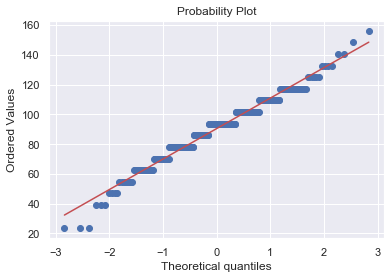

In [115]:
stats.probplot(d3, plot=plt)

In [116]:
stats.shapiro(d4)

(0.9523671865463257, 4.465105973849859e-07)

((array([-2.75933054, -2.4557772 , -2.28328699, -2.16004857, -2.06287664,
         -1.98199509, -1.91231946, -1.85085323, -1.79567568, -1.74547884,
         -1.69933016, -1.65654039, -1.61658509, -1.57905556, -1.54362686,
         -1.51003617, -1.47806779, -1.44754238, -1.41830919, -1.39024018,
         -1.36322568, -1.33717096, -1.31199365, -1.2876216 , -1.26399128,
         -1.24104643, -1.21873697, -1.19701815, -1.17584975, -1.15519554,
         -1.13502271, -1.1153015 , -1.09600478, -1.07710777, -1.05858776,
         -1.0404239 , -1.02259697, -1.00508923, -0.98788428, -0.97096689,
         -0.95432293, -0.93793922, -0.92180349, -0.90590426, -0.8902308 ,
         -0.87477304, -0.85952153, -0.84446737, -0.82960221, -0.81491814,
         -0.80040772, -0.7860639 , -0.77188002, -0.75784976, -0.74396711,
         -0.73022639, -0.71662218, -0.70314933, -0.68980292, -0.67657826,
         -0.66347089, -0.65047653, -0.63759109, -0.62481066, -0.61213147,
         -0.59954994, -0.58706261, -0.

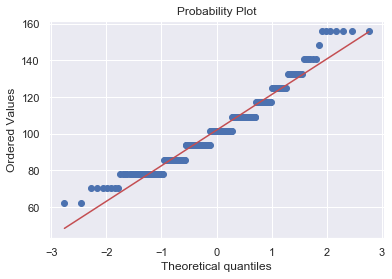

In [117]:
stats.probplot(d4, plot=plt)

综上，数据不符合正态性

In [120]:
stats.kruskal(d1, d2, d3, d4)

KruskalResult(statistic=40.44634079106686, pvalue=8.56906363526187e-09)

pvalue远小于0.05,拒绝原假设,可以认为四个时间点的总信心值不相等

Text(0, 0.5, 'mean of index1')

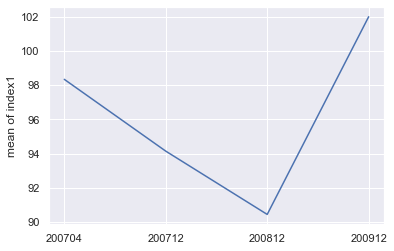

In [71]:
plt.plot(Series(data.groupby('time').index1.mean().values, index=['200704', '200712', '200812', '200912']))
plt.ylabel('mean of index1')

In [121]:
F, pvalue = stats.f_oneway(d1, d2, d3, d4)
print('pvalue=', pvalue)

pvalue= 2.3879283660952423e-10


In [122]:
from statsmodels.stats.multicomp import MultiComparison

In [123]:
mc = MultiComparison(data.index1, data.time)

In [124]:
tukey_result = mc.tukeyhsd(alpha = 0.5)
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
200704 200712  -4.1972 0.0597  -6.5417 -1.8527   True
200704 200812   -7.897  0.001 -10.2415 -5.5525   True
200704 200912   3.6599 0.1706    1.162  6.1578   True
200712 200812  -3.6998 0.1198  -6.0365 -1.3631   True
200712 200912   7.8571  0.001   5.3666 10.3477   True
200812 200912  11.5569  0.001   9.0663 14.0475   True
-----------------------------------------------------


### 7.4 总结

**名义数据**

| 比较的组数 | 独立样本                     | 配对样本    |
| ---------- | ---------------------------- | ----------- |
| 2个或以上  | Fisher将却概率检验或卡方检验 | McNemar检验 |

**有序数据**

| 比较的组数 | 独立样本           | 配对样本             |
| ---------- | ------------------ | -------------------- |
| 2          | Mann-Whitney U检验 | Wilcoxon符号秩和检验 |
| 3个或以上  | Kruskal-Wallis检验 | Friedman检验         |

**连续数据**

| 比较的组数 | 独立样本                          | 配对样本                         |
| ---------- | --------------------------------- | -------------------------------- |
| 1          | 单样本t检验或Wilcoxon符号秩和检验 |                                  |
| 2          | 独立样本t检验或Mann-Whitney检验   | 配对t检验或Wilcoxon符号秩和检验  |
| 3个或以上  | 方差检验或Kruskal-Wallis检验      | 重复测量的方差分析或Friedman检验 |

**例题**

1.一家汽车厂设计出3款新型号的手刹，现欲比较它们与传统手刹的寿命。现在分别从传统手刹、型号Ⅰ、Ⅱ、Ⅲ中抽取5个样本，在相同的实验条件下，测量其使用寿命（单位：月），结果如下：  

传统手刹：21.2、13.4、17.0、15.2、12.0  
型号Ⅰ：21.4、12.0、15.0、18.9、24.5  
型号Ⅱ：15.2、19.1、14.2、16.5、20.3  
型号Ⅲ：38.7、38.5、39.0、32.2、29.6   

各种型号间的寿命有无差别 ？  

假设：  
H0：μ<sub>1</sub>=μ<sub>2</sub>=μ<sub>3</sub>=μ<sub>4</sub>，四种型号之间的寿命无明显差别  
H1：μ<sub>1</sub>≠μ<sub>2</sub>≠μ<sub>3</sub>≠μ<sub>4</sub>，四种型号之间的寿命有明显差别 

In [269]:
%matplotlib inline
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import random
np.random.seed(987654321)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison

In [270]:
# 导入数据
data = DataFrame(columns=['Time', 'Type'])
data.Time = Series([21.2, 13.4, 17.0, 15.2, 12.0, 21.4, 12.0, 15.0, 18.9, 24.5, 15.2, 19.1, 
                       14.2, 16.5, 20.3, 38.7, 35.8, 39.0, 32.3, 29.6])
data.Type = Series([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4])
data.tail()

,Time,Type
15,38.7,4
16,35.8,4
17,39.0,4
18,32.3,4
19,29.6,4


In [271]:
# 正态性检验
data.groupby('Type').apply(stats.shapiro)

Type
1     (0.8020443916320801, 0.015351979061961174)
2      (0.807869553565979, 0.018067169934511185)
3     (0.7728205323219299, 0.006768729537725449)
4    (0.7385923266410828, 0.0025920032057911158)
dtype: object

((array([-1.12899754, -0.48565271,  0.        ,  0.48565271,  1.12899754]),
  array([12. , 13.4, 15.2, 17. , 21.2])),
 (4.0169398819179385, 15.76, 0.9761993647116561))

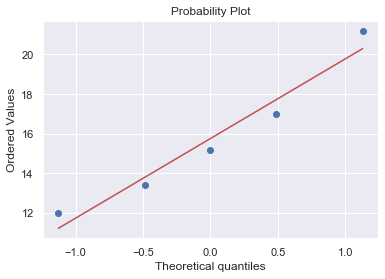

In [272]:
stats.probplot(data[data.Type==1].Time, dist='norm', plot=plt)

((array([-1.12899754, -0.48565271,  0.        ,  0.48565271,  1.12899754]),
  array([12. , 15. , 18.9, 21.4, 24.5])),
 (5.700336006516015, 18.36, 0.9959069904835715))

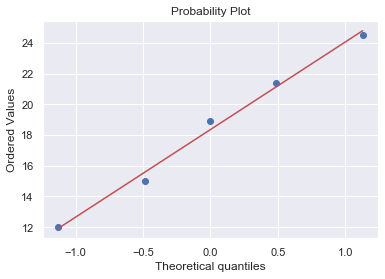

In [273]:
stats.probplot(data[data.Type==2].Time, dist='norm', plot=plt)

((array([-1.12899754, -0.48565271,  0.        ,  0.48565271,  1.12899754]),
  array([14.2, 15.2, 16.5, 19.1, 20.3])),
 (2.906641999804017, 17.06, 0.9793260014742913))

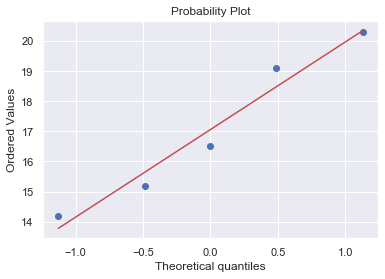

In [274]:
stats.probplot(data[data.Type==3].Time, dist='norm', plot=plt)

((array([-1.12899754, -0.48565271,  0.        ,  0.48565271,  1.12899754]),
  array([29.6, 32.3, 35.8, 38.7, 39. ])),
 (4.541810255468957, 35.08, 0.9662385400584041))

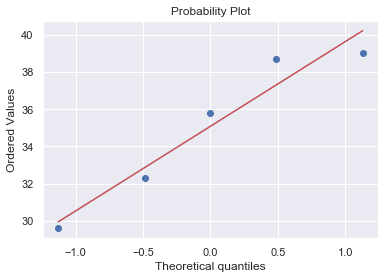

In [275]:
stats.probplot(data[data.Type==4].Time, dist='norm', plot=plt)

大体上，较为符合正态性

In [276]:
# 方差齐性检验
stats.levene(data[data.Type==1].Time, data[data.Type==2].Time, data[data.Type==3].Time, data[data.Type==4].Time)

LeveneResult(statistic=0.6150281363786824, pvalue=0.6151685160094906)

pvalue=0.615>0.05，无法拒绝原假设，可以认为方差齐性

In [277]:
# 单因素方差分析
model = ols(formula='Time~C(Type)',data=data).fit()  # formula='预测值'~'数值型'+...+C('分类型',...)
anova_table = anova_lm(model, typ = 2)
print(anova_table)

             sum_sq    df          F    PR(>F)
C(Type)   1234.6015   3.0  27.043014  0.000002
Residual   243.4840  16.0        NaN       NaN


Text(0.5, 1.0, 'The plot of means')

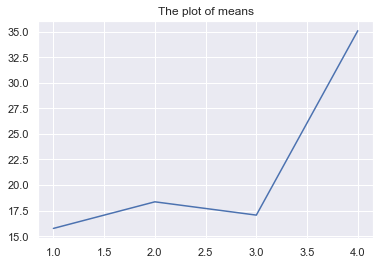

In [278]:
plt.plot(data.groupby('Type').mean())
plt.title('The plot of means')

由于p值远小于0.05，拒绝原假设，可以认为四种型号之间的寿命有明显差别

In [279]:
# 多重比较
mc = MultiComparison(data.Time, data.Type)

In [280]:
tukey_result = mc.tukeyhsd(alpha = 0.5)
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2      2.6 0.7026 -0.9273  6.1273  False
     1      3      1.3    0.9 -2.2273  4.8273  False
     1      4    19.32  0.001 15.7927 22.8473   True
     2      3     -1.3    0.9 -4.8273  2.2273  False
     2      4    16.72  0.001 13.1927 20.2473   True
     3      4    18.02  0.001 14.4927 21.5473   True
----------------------------------------------------


根据多重比较的结果，传统手刹及型号Ⅰ、Ⅱ之间的寿命没有明显差别，这三类手刹的寿命与型号Ⅲ手刹的寿命有明显差别。

## 8 分类数据的检验

**$\chi^2$检验**  
最常见的类型，主要用于拟合优度检验和独立性检验。拟合优度检验用来判断期望频数和观察频数之间是否有差异，独立性检验主要判断两个独立变量是否有差异。  
$\chi^2=\sum\frac{(f_o-f_e)^2}{f_e}$

In [147]:
%matplotlib inline
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import random
np.random.seed(987654321)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison

### 8.1 $\chi^2$检验

**8.1.1 单因素$\chi^2$检验：拟合优度检验**  

例：假如你和朋友去远足，晚上抽签决定洗餐具，旅行结束后洗餐具结果如下。请问是否有人作弊？  
数据：10, 6, 5, 4, 5, 3  

H0：观察频数与期望频数一致  
H1：观察频数与期望频数不一致

In [159]:
data = Series([10, 6, 5, 4, 5, 3])
exp_data = Series([data.sum() / len(data), ] * len(data))
exp_data

0    5.5
1    5.5
2    5.5
3    5.5
4    5.5
5    5.5
dtype: float64

In [164]:
v, pvalue = stats.chisquare(f_obs=data, f_exp=exp_data)
print('pvalue=', pvalue)

pvalue= 0.37313038594870584


pvalue=0.373>0.05，无法拒绝原假设，可以认为观察频数与期望频数一致

**8.1.2 $\chi^2$连列表检验：独立性检验**  

假设：
* 所有的绝对期望频数$e_i\geq1$
* 至少80%的绝对期望频数$e_i\geq5$  
对于小样本数应该对连续卡方分布造成的偏误进行校正，因为频数按照定义是整数，该校正被称为Yates校正  

自由度：df=(r-1)×(c-1)  

例：男女性左右利手数据如下，请问性别和左右利手是否独立？  

|      | 右利手 | 左利手 | 总计 |
| ---- | ------ | ------ | ---- |
| 男性 | 43     | 9      | 52   |
| 女性 | 44     | 4      | 48   |
| 总计 | 87     | 13     | 100  |

H0：性别和左右利手之间是独立的  
H1：性别和左右利手之间是相互依赖的

In [176]:
n = 100  # 总频数
rows = 2
cols = 2
data = DataFrame([[43, 9], [44, 4]], columns=['右利手', '左利手'], index=['男性', '女性'])

In [174]:
chi2, pvalue, dof, excepted = stats.chi2_contingency(data)
print('pvalue=', pvalue)

pvalue= 0.300384770390566


pvalue=0.3>0.05，无法拒绝原假设，可以认为左右利手和性别间是独立的。这里默认用了Yates校正。  

**列联表相关测量**

* $\varphi相关系数$：无上限，适用于2×2列联表，$\varphi=\sqrt{\chi^2/n}$  
* c系数：计算简单，对于总体分布没有要求，适应性较广，但它不可能大于1。$c=\sqrt{\frac{\chi^2}{\chi^2+n}}$
* V相关系数：$V=\sqrt{\frac{\chi^2}{n\times\\min[(R-1),(C-1)]}}$

In [177]:
varphi = math.sqrt(chi2/n)
c = math.sqrt(chi2/(chi2+n))
V = math.sqrt(chi2/n*1)

In [178]:
print('varphi=', varphi)
print('c=', c)
print('V=', V)

varphi= 0.10356086167566356
c= 0.10300995159723356
V= 0.10356086167566356
